In [1]:
# %%time
## Just an easy way to load utility functions
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}


Toggle code

In [2]:
global BES_label_list, BES_df_list

# %run f2f_utility.py

BES_df_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
demo_var_dict = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
var_type_dict_nonans = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )

generic_cols = f2f_harmonised.columns
list_of_scale_harm_vars = ["Age","year_past_min_sch_leave_age","in_school_past_min_age"]



## BUGS

BES_label_list["1959"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1964"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1966"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1970"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'

BES_label_list["2015"]['edlevel'] = 'Education level (summary)'



In [4]:
f2f_harmonised.columns

Index(['dataset', 'uid', 'housing_det', 'housing', 'inc', 'vote', 'year', 'wt',
       'age', 'vote_simple', 'bloc', 'birth_year', 'harmonised_voted',
       'inc_det', 'vote_complete', 'vote_complete_simple', 'bloc_complete',
       'turnout_complete', 'gender', 'gender_complete'],
      dtype='object')

In [ ]:
### 1974_feb

# 'feb185': 'any further education', 'feb186': 'sort of further education'
# 'feb183': 'school attended', 'feb184': 'age left school'

### like to look for correlates!
### 1974_oct

# 'oct185a': 'further education and type'
# 'oct183': 'school attended', 'oct184': 'age left school'

### 1979
# 'm000237': 'exam to enter last school attended:-q86a',
# 'm000238': 'tuition fees charged at school:-q86b',
# 'm184239': 'age left school-q87',
# 'm000240': 'did r have further educatn or traing-q88',
# 'm000241': 'age r completed full-time education-q90',
# 'm000242': 'rsa or city & guilds-q91',
# 'm000243': 'cse-q91',
# 'm000244': 'o levels or scot lower-q91',
# 'm000245': 'school certificate or matric-q91',
# 'm000246': 'a levels or scot higher-q91',
# 'm000247': "teachers' training qual-q91",
# 'm000248': 'degree-q91',
# 'm000249': 'professional qualification-q91',
# 'm000250': 'apprenticeship-q91',
# 'm000251': 'special qual. gained at work-q91',
# 'm000252': 'other qualification-q91',
# 'm183314': 'school attended',
# 'm185a315': 'further education and type'

### 1983

# 'q58p': 'resp,spouse rcvd student grant',
# 'q59a': 'age respondent left school',
# 'q59b': '[unless no schoolng] r last school in uk',
# 'q60a': '[if uk] type of school r last attended',
# 'q60b': '[unless primry,specl sch] entrance exam',
# 'q60c': '[if uk] did f pay fees: prim,sec school',
# 'q61a': 'did r have further education, & type',
# 'q61b': '[unless rcvng fe] chldrn at feepayng sch',
# 'q62a': 'no qualification obtained by respondent',
# 'q62b': 'qual obtnd: cse 2-5',
# 'q62c': 'qual obtnd: cse1,o level,scot lower, etc',
# 'q62d': 'qual obtnd: gce a level, scot higher',
# 'q62e': 'qual obtnd: degree',
# 'q62f': 'qual obtnd: rsa or similar clerical qual',
# 'q62g': 'qual obtnd: c & guilds craft,ordinary',
# 'q62h': 'qual obtnd: c & guilds advanced,final',
# 'q62i': 'qual obtnd: c & guilds full technologcl',
# 'q62j': 'qual obtnd: onc ond bec tec ord,general',
# 'q62k': 'qual obtnd: hnc hnd bec tec higher',
# 'q62l': 'qual obtnd: full apprenticeship qual',
# 'q62m': 'qual obtnd: teachers training qual',
# 'q62n': 'qual obtnd: nursing qual',
# 'q62o': 'other professional qual obtained',
# 'q62p': 'other diploma,certificate obtained',
# 'q62q': 'overseas school leaving qual obtained',
# 'q62r': 'overseas degree obtained',
# 'q62s': 'overseas other post-school qual obtained'

### 1987

# 'v55': "respondent's age when completed full-time education",
# 'v56a': "resp's exams/quals: no qualifications",
# 'v56b': "resp's exams/quals: cse grades 2-5",
# 'v56c': 'exams o level scottish low',
# 'v56d': 'exams o level scottish higher',
# 'v56e': "resp's exams/quals: trade apprenticeship",
# 'v56f': 'exams rsa/other commercial quals',
# 'v56g': 'exams city/guilds certificate',
# 'v56h': 'exams city/guilds advanced',
# 'v56i': 'exams city/guilds technological',
# 'v56j': 'exams bec/tec ond/onc',
# 'v56k': "resp's exams/quals: hnc/hnd",
# 'v56l': "resp's exams/quals: teacher training certificate",
# 'v56m': "resp's exams/quals: nursing qualification",
# 'v56n': "resp's exams/quals: other tech/business/professional",
# 'v56o': "resp's exams/quals: university or cnaa degree",
# 'v56p': "resp's exams/quals: other",
# 'v56q': "resp's overseas exams/quals: school leaving cert.",
# 'v56r': "resp's overseas exams/quals: degree",
# 'v56s': "resp's overseas exams/quals: other post school",
# 'v57': "resp's private primary/secondary school",

# 'v126': 'type of school respondent last attended full-time'

### 1992

# 'v912a': 'have you passed any school quals?  q912a',
# 'v913a': 'have passed post school quals?     q913a',
# 'v914a': 'r go to private, fee-paying school? q914a',
# 'v914b': 'considered private school for child q914b',
# 'hedqual': 'highest educational qualification     dv',
# 'v912b_01': 'qual obtained:cse grade 2-5     q912b.01',
# 'v912b_02': 'qual obtained:cse grade 1,o-level q912b.02',
# 'v912b_03': 'qual obtained:a-level etc       q912b.03',
# 'v912b_04': 'qual obtained:overseas school leaving q912b.04',
# 'v913b_01': 'qual obtained:trade apprenticeship q913b.01',
# 'v913b_02': 'qual obtained:rsa, similar clerical q913b.02',
# 'v913b_03': 'qual obtained:city+guilds craft q913b.03',
# 'v913b_04': 'qual obtained:city+guilds advanced q913b.04',
# 'v913b_05': 'qual obtained:city+guilds full tech q913b.05',
# 'v913b_06': 'qual obtained: bec ordinary onc,ond  q913b.06',
# 'v913b_07': 'qual obtained:bec higher,hnc,hnd   q913b.07',
# 'v913b_08': 'qual obtained:teacher training  q913b.08',
# 'v913b_09': 'qual obtained:nursing qualification q913b.09',
# 'v913b_10': 'qual obtained:univ/cnaa degree  q913b.10',
# 'v913b_11': 'qual obtained:other tech.business  q913b.11',
# 'v913b_12': 'qual obtained:other academic/vocational q913b.12'

## 1997

## nontrivial no of respondents in full-time education! (training scheme not meaningful nos though)

# 'rschrsi': 'hours work on government training scheme/week q743',
# 'sschrsi': 'spouse/partner hours worked on training scheme? q812',

# 'tea': 'terminal education age? q866',
# 'schqual': 'does r have school qualifications? q867',
# 'edqual1': 'qual obtained: cse grade 2-5 q885',
# 'edqual2': 'qual obtained: cse grade1,o-level, etc. q886',
# 'edqual3': 'qual obtained: a-level etc. q887',
# 'edqual4': 'qual obtained: overseas school leaving exam q888',
# 'pschqual': 'r passed any work exams/qualifications? q889',
# 'edqual5': 'qual obtained: trade apprenticeship q910',
# 'edqual6': 'qual obtained: rsa, similar clerical q911',
# 'edqual10': 'qual obtained: bec ordinary, onc, ond q915',
# 'edqual11': 'qual obtained: bec higher, hnc, hnd q916',
# 'edqual12': 'qual obtained: teacher training qualification q917',
# 'edqual13': 'qual obtained: nursing qualification q918',
# 'edqual14': 'qual obtained: other tech, business qualification q919',
# 'edqual15': 'qual obtained: univ, cnaa degree, diploma q920',
# 'edqual16': 'qual obtained: other academic/vocational q921',
# 'edqual17': 'qual obtained: nvq/svq l1/gnvq foundation q922',
# 'edqual18': 'qual obtained: nvq/svq l2/gnvq intermediate q923',
# 'edqual19': 'qual obtained: nvq/svq l3/gnvq advanced q924',
# 'edqual20': 'qual obtained: nvq/svq level 4 q925',
# 'edqual21': 'qual obtained: nvq/svq level 5 q926',
# 'edqual22': 'qual obtained: city & guilds certificate - part i q927',
# 'edqual23': 'qual obtained: city+guilds craft etc. q927',
# 'edqual24': 'qual obtained: city+guilds advanced etc. q927',
# 'edqual25': 'qual obtained: city+guilds full technical q927',
# 'hedqual': 'highest educational qualification? q928',
# 'rprivsch': 'r go to a private, fee-paying school? q930',
# 'prvedcon': 'r sent/consider sending child to private school? q931',

### 2001

# 'aq4d': 'present government handle education',
# 'aq42': 'age completed full-time education',
# 'aq43a': 'have educational/work qualifications',
# 'aq43b': 'highest qualification',
# 'aq50aux4': 'ethncity-other 4',
# 'bq6d': 'labour government handle education',
# 'bq75b': 'age complete full-time education',
# 'bq76a': 'any educational/work qualificiations',
# 'bq76b': 'educational/work qualifications',
# 'edquals': 'educational/work qualifications-summary'

### 2005

# 'aq52': 'age finish full-time education',
# 'aq53a': 'have educational qualification',
# 'aq53b': 'highest educational qualification',
# 'bq81': 'age finish full-time education(3rd)',
# 'bq82a': 'have educational qualification(3rd)',
# 'bq82b': 'highest educational qualification(3rd)',
# 'tq81': 'combined-age finish full-time education',
# 'tq82a': 'combined-have educational qualification',
# 'tq82b': 'combined-highest educational qualification',

### 2010

# 'aq67': 'age finish full-time education',
# 'aq68_1': 'have educ, work qualifications',
# 'aq68_2': 'highest qualification',
# 'bq95_1': 'age finish full-time education(3rd)',
# 'bq95_2': 'have educ work-related qualifications',
# 'bq95_3': 'highest qualification(3rd)',
# 'v114_a': 'm. education',
# 'v126_a': 'multi person household all student',
# 'zq95_1': 'age finish full-time education(4th)',
# 'zq95_2': 'have educ work-related qualifications(3rd)',
# 'zq95_3': 'highest qualification(4th)'

### 2015

# 'y05': 'Y5 Did you ever go to a private fee-paying school in Britain?',
# 'y12a': 'Y12A Do you have any educational or work-related qualifications?',
# 'education': 'Y13A What is the highest qualification you have?'
# 'edlevel': 'Education level (summary)'

### 2017

# 'y12a': 'Y12A Do you have any educational or work-related qualifications?',
# 'education': 'Y13A. What is the highest qualification you have?'
# 'edlevel': 'Education level (summary)'


### 2019

# 'y02_10': 'Main source of income: Student grant, bursary, or loans',
# 'y05': 'Did you ever go to a private fee-paying school in the UK?',
# 'y12a': 'Do you have any educational or work-related qualifications?',
# 'education': 'What is the highest qualification you have?',
# 'edlevel': 'Education level (summary)'



In [13]:
for ge in BES_label_list.keys():
    print(ge,{k:v for k,v in BES_label_list[ge].items() if "left school" in v})

2019 {}
2017 {}
2015 {}
2010 {}
2005 {}
2001 {}
1997 {}
1992 {}
1987 {}
1983 {'q59a': 'age respondent left school'}
1979 {'m184239': 'age left school-q87'}
1974_feb {'feb184': 'age left school'}
1974_oct {'oct184': 'age left school'}
1970 {}
1966 {}
1964 {}
1959 {}


In [ ]:
## age left school (needs to go back to 13)

# (15/14/13)
# 16                                             446
# 19 or older                                    422
# 15 or younger                                  383
# 18                                             153
# 17                                             129
# still at university in full-time education      33
# still at school in full-time education          10
# don't know                                       1

In [ ]:
## degree

# Undergraduate        1249
# No qualifications     762
# A-level               681
# GCSE                  451
# Postgrad              423
# Below GCSE            202

# Below GCSE?
# https://en.wikipedia.org/wiki/Entry_Level_Certificate

In [ ]:

# 'aq67': 'age finish full-time education',
# 'aq68_1': 'have educ, work qualifications',
# 'aq68_2': 'highest qualification',
# 'bq95_1': 'age finish full-time education(3rd)',
# 'bq95_2': 'have educ work-related qualifications',
# 'bq95_3': 'highest qualification(3rd)',
# 'v114_a': 'm. education',
# 'v126_a': 'multi person household all student',
# 'zq95_1': 'age finish full-time education(4th)',
# 'zq95_2': 'have educ work-related qualifications(3rd)',
# 'zq95_3': 'highest qualification(4th)'

In [26]:
BES_df_list["2010"]['zq95_2'].value_counts(dropna=False)

yes           2291
no             779
don't know       4
refused          1
Name: zq95_2, dtype: int64

In [19]:
BES_df_list["2010"]['zq95_1'].value_counts(dropna=False)

16                                            848
19 or older                                   810
15 or younger                                 752
18                                            310
17                                            272
still at university in full-time education     54
still at school in full-time education         25
don't know                                      3
refused                                         1
Name: zq95_1, dtype: int64

In [20]:
BES_df_list["2010"]['zq95_2'].value_counts(dropna=False)

yes           2291
no             779
don't know       4
refused          1
Name: zq95_2, dtype: int64

In [21]:
BES_df_list["2010"]['zq95_3'].value_counts(dropna=False)

NaN                                                             784
first degree                                                    372
gcse a*-c cse grade 1 o level grade a-c                         308
hnc/hnd city&guilds level 4 nvq/svq 4/5                         268
postgraduate degree                                             246
a level or equivalent                                           170
onc/ond city&guilds level 3 nvq/svq 3                           157
city&guilds level 2 nvq/svq 2 or equivalent                     120
other technical professional or higher qualification (write      94
univ/poly diploma                                                89
nursing qualification                                            73
gcse d-g cse grades 2-5 o level d-e                              68
clerical and commercial qualifications                           67
recognised trade apprenticeship                                  65
teaching qualification                          

In [23]:
BES_df_list["2010"]['zq95_3'].groupby(BES_df_list["2010"]['zq95_1']).value_counts(dropna=False).head(50)

zq95_1         zq95_3                                                      
refused        NaN                                                               1
don't know     NaN                                                               1
               a level or equivalent                                             1
               city&guilds level 1 nvq/svq 1 or equivalent                       1
15 or younger  NaN                                                             462
               recognised trade apprenticeship                                  41
               hnc/hnd city&guilds level 4 nvq/svq 4/5                          36
               clerical and commercial qualifications                           31
               city&guilds level 2 nvq/svq 2 or equivalent                      29
               onc/ond city&guilds level 3 nvq/svq 3                            26
               other technical professional or higher qualification (write      26
           

In [24]:
BES_df_list["2010"]['zq95_3'].groupby(BES_df_list["2010"]['zq95_1']).value_counts(dropna=False).tail(50)

zq95_1                                      zq95_3                                                      
18                                          nursing qualification                                             8
                                            scottish higher or equivalent                                     7
                                            gcse d-g cse grades 2-5 o level d-e                               5
                                            teaching qualification                                            4
                                            youth training certificate skill seekers                          2
                                            refused                                                           1
                                            recognised trade apprenticeship                                   1
19 or older                                 first degree                                                    293

In [25]:
BES_df_list["2010"]['zq95_1'].groupby(BES_df_list["2010"]['zq95_3']).value_counts(dropna=False).head(50)

zq95_3                                   zq95_1                                    
refused                                  16                                              1
                                         18                                              1
                                         19 or older                                     1
don't know                               16                                              7
                                         15 or younger                                   3
                                         17                                              1
                                         19 or older                                     1
                                         still at school in full-time education          1
postgraduate degree                      19 or older                                   208
                                         16                                             13
      

In [30]:
# BES_df_list["2010"]['zq95_2'].value_counts(dropna=False)
BES_df_list["2010"]['zq95_3'].groupby(BES_df_list["2010"]['zq95_2']).value_counts(dropna=False).head(50)

zq95_2      zq95_3                                                      
refused     NaN                                                               1
don't know  NaN                                                               4
yes         first degree                                                    372
            gcse a*-c cse grade 1 o level grade a-c                         308
            hnc/hnd city&guilds level 4 nvq/svq 4/5                         268
            postgraduate degree                                             246
            a level or equivalent                                           170
            onc/ond city&guilds level 3 nvq/svq 3                           157
            city&guilds level 2 nvq/svq 2 or equivalent                     120
            other technical professional or higher qualification (write      94
            univ/poly diploma                                                89
            nursing qualification              

In [47]:
generic_cols = f2f_harmonised.columns

def full_form_birth_year(x):
    if pd.isnull(x):
        return np.nan
    elif x>60:
        return 1800 + x
    else:
        return 1900 + x
    
def rep_char(x):
    return x.replace('[', '{').replace(']', '}').replace('<', '{').replace('>', '}')

def replace_var_names(labels):
    varname_replace_dict = {}
    replace_char_dict = {"[":"{","]":"}"}
    for col in df_simp.columns:
        if np.any([x in col for x in generic_cols]) or (col =="Age"):
            # 'age' is a problem as a common word component
            varname_replace_dict[col] = rep_char(col)
            
        elif "|" not in col:
            varname_replace_dict[col] = rep_char(labels[col])
        elif len(col.split("|"))==2:
            varname_replace_dict[col] = rep_char(labels[col.split("|")[0]])\
                +"("+ rep_char(col.split("|")[1]) +")"
        if varname_replace_dict[col]=="":
            varname_replace_dict[col] = rep_char(col)
    return varname_replace_dict

def rep_char(x):
    return x.replace('[', '{').replace(']', '}').replace('<', '{').replace('>', '}')

def replace_var_names(labels,df_simp):
    varname_replace_dict = {}
    replace_char_dict = {"[":"{","]":"}"}
    for col in df_simp.columns:
        if np.any([x in col for x in generic_cols]) or (col =="Age"):
            # 'age' is a problem as a common word component
            varname_replace_dict[col] = rep_char(col)
            
        elif "|" not in col:
            varname_replace_dict[col] = rep_char(labels[col])
        elif len(col.split("|"))==2:
            varname_replace_dict[col] = rep_char(labels[col.split("|")[0]])\
                +"("+ rep_char(col.split("|")[1]) +")"
        if varname_replace_dict[col]=="":
            varname_replace_dict[col] = rep_char(col)
    return varname_replace_dict

def prep_df_only(ge,target_var,target_var_replace_dict,target_var_drop_list,target_var_title_pair,
       var_stub,harm_vars,min_features,dependence_plots=False,drop_vars = [],demo_var_only=True,
        multi_class_target=False,dummy_na=True,specific_vars = False):

    if demo_var_only:
        demo_vars = demo_var_dict[ge]
    elif specific_vars:
        demo_vars = specific_vars
    else:
        demo_vars = list(BES_label_list[ge].keys())

#     labels = BES_label_list[ge]
    df = pd.concat([BES_df_list[ge],
                            f2f_harmonised[f2f_harmonised["dataset"]==ge][harm_vars]
                           ],axis=1)
    old_demo_vars = demo_vars.copy()
    demo_vars = demo_vars+harm_vars
    demo_vars = list(set(demo_vars).intersection(df.columns))
    if drop_vars:
        demo_vars = [x for x in demo_vars if x not in drop_vars]
        old_demo_vars = [x for x in old_demo_vars if x not in drop_vars]    

    df_simp = df[demo_vars].copy()

    df_simp[target_var] = df_simp[target_var].replace(target_var_replace_dict)
    # prep nominal and ordinal as categorical to be dummied
    old_demo_vars = [x for x in old_demo_vars if var_type_dict_nonans[ge][x] in ["nominal","ordinal"]]
    scale_vars = [x for x in old_demo_vars if var_type_dict_nonans[ge][x] in ["scale"]]
        
    if not multi_class_target:
        df_simp[target_var] = df_simp[target_var].replace(target_var_replace_dict)    
        df_simp[old_demo_vars] = df_simp[old_demo_vars].astype('category')    
        df_simp[scale_vars] = df_simp[scale_vars].astype('float')
        df_simp = pd.get_dummies(df_simp,prefix_sep='|',dummy_na=dummy_na).drop(target_var_drop_list,axis=1)
        if target_var+"|nan" in df_simp.columns:
            df_simp.loc[df_simp[target_var+"|nan"]==1,var_stub]=np.nan
            df_simp.drop(target_var+"|nan",axis=1,inplace=True,)
    else:
        old_demo_vars = [x for x in old_demo_vars if x !=target_var]
        scale_vars = [x for x in scale_vars if x !=target_var]   
        df_simp[old_demo_vars] = df_simp[old_demo_vars].astype('category')    
        df_simp[scale_vars] = df_simp[scale_vars].astype('float')        
        df_simp[target_var] = df_simp[target_var].astype('category')
        target_var_drop_list = [x for x in target_var_drop_list if x in df_simp[target_var].cat.categories]
        df_simp[target_var] = df_simp[target_var].cat.remove_categories(target_var_drop_list)        
        all_but_target = [x for x in df_simp.columns if x !=target_var]
        target_temp = df_simp[target_var].copy()
        df_simp = pd.get_dummies(df_simp[all_but_target],prefix_sep='|',dummy_na=dummy_na)
        df_simp[target_temp.name] = target_temp
        

    df_simp = df_simp.rename(columns = replace_var_names( BES_label_list[ge] , df_simp ))  
    

    Treatment = var_stub+"_"+ge

    var_list = [var_stub]
    var_stub_list = [var_stub,]
    if not multi_class_target:
        df_simp = df_simp.select_dtypes('number')
        df_simp = df_simp.astype('float')
#     mask = df_simp[var_stub].notnull() & df_simp["wt"].notnull()
    return df_simp

def prep_df(ge,target_var,target_var_replace_dict,target_var_drop_list,target_var_title_pair,
       var_stub,harm_vars,min_features,dependence_plots=False,drop_vars = [],demo_var_only=True,alg=None,
           multi_class_target=False,dummy_na=True,specific_vars = False):

    # drop drop_var variables from demo_var list
    if demo_var_only:
        demo_vars = demo_var_dict[ge]
    elif specific_vars:
        demo_vars = specific_vars
    else:
        demo_vars = list(BES_label_list[ge].keys())
        

#     labels = BES_label_list[ge]
    df = pd.concat([BES_df_list[ge],
                            f2f_harmonised[f2f_harmonised["dataset"]==ge][harm_vars]
                           ],axis=1)

    
    old_demo_vars = demo_vars.copy()
    demo_vars = demo_vars+harm_vars
    demo_vars = list(set(demo_vars).intersection(df.columns))
    # drop vars after adding harm/dropping ones not present
    if drop_vars:
        demo_vars = [x for x in demo_vars if x not in drop_vars]    
        old_demo_vars = [x for x in old_demo_vars if x not in drop_vars]    

    df_simp = df[demo_vars].copy()



    # prep nominal and ordinal as categorical to be dummied
    old_demo_vars = [x for x in old_demo_vars if var_type_dict_nonans[ge][x] in ["nominal","ordinal"]]
    scale_vars = [x for x in old_demo_vars if var_type_dict_nonans[ge][x] in ["scale"]]
    
    if not multi_class_target:
        df_simp[target_var] = df_simp[target_var].replace(target_var_replace_dict)    
        df_simp[old_demo_vars] = df_simp[old_demo_vars].astype('category')    
        df_simp[scale_vars] = df_simp[scale_vars].astype('float')
        df_simp = pd.get_dummies(df_simp,prefix_sep='|',dummy_na=dummy_na).drop(target_var_drop_list,axis=1)
        if target_var+"|nan" in df_simp.columns:
            df_simp.loc[df_simp[target_var+"|nan"]==1,var_stub]=np.nan
            df_simp.drop(target_var+"|nan",axis=1,inplace=True,)
        eval_metric='rmse'
    else:
        old_demo_vars = [x for x in old_demo_vars if x !=target_var]
        scale_vars = [x for x in scale_vars if x !=target_var]
        df_simp[old_demo_vars] = df_simp[old_demo_vars].astype('category')    
        df_simp[scale_vars] = df_simp[scale_vars].astype('float')
        df_simp[target_var] = df_simp[target_var].astype('category')
        target_var_drop_list = [x for x in target_var_drop_list if x in df_simp[target_var].cat.categories]
        df_simp[target_var] = df_simp[target_var].cat.remove_categories(target_var_drop_list)
        all_but_target = [x for x in df_simp.columns if x !=target_var]
        target_temp = df_simp[target_var].copy()
        df_simp = pd.get_dummies(df_simp[all_but_target],prefix_sep='|',dummy_na=dummy_na)
        df_simp[target_temp.name] = target_temp
        eval_metric='mlogloss'
    
    df_simp = df_simp.rename(columns = replace_var_names( BES_label_list[ge] , df_simp ))  
    

    Treatment = var_stub+"_"+ge

    var_list = [var_stub]
    var_stub_list = [var_stub,]
    
    if not multi_class_target:
        df_simp = df_simp.select_dtypes('number')
        df_simp = df_simp.astype('float')
        
    mask = df_simp[var_stub].notnull() & df_simp["wt"].notnull()
    colname = var_stub
    if target_var_title_pair is not None:
        title = "\n\nMore Likely to "+target_var_title_pair[0]+" <---   ---> More Likely to"+target_var_title_pair[1]
    else:
        title = ""
    (explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics)=\
        xgboost_run(subdir=colname,dataset=df_simp[mask].drop("wt",axis=1),
                var_list=var_list,var_stub_list=var_stub_list,
                use_specific_weights=df_simp["wt"][mask],
                min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
                skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
                title = title)
    
    return (explainer, shap_values, train_columns, train_index, alg,output_subfolder)

In [48]:
def xgboost_run(title, dataset, var_list,var_stub_list=[], subdir=None, min_features=30, dependence_plots=False , output_folder=".."+os.sep+"Output"+os.sep,Treatment="default",
                use_specific_weights = None, automatic_weights_from_wave_no = False, alg = None,verbosity=1,skip_bar_plot=False,
                eval_metric = ['rmse'],minimum_sample=50,dont_stop_on_sample_size_err=False,print_shap_chart=True,plot_validation=False,
                threshold=.1):
    if alg is None:
        alg = get_xgboost_alg()
        alg.verbosity=verbosity
    if verbosity>=1:
        verbose=True
    else:
        verbose=False
    # global BES_Panel
    # for target_var,base_var in zip(var_list,base_list):
    treatment_subfolder = create_subdir(output_folder,Treatment)

    
    for target_var in var_list:
        if automatic_weights_from_wave_no:
            wave_no = get_wave_no( target_var )
            weight_var = num_to_weight[wave_no]    
            print( target_var, wave_no )

        target = create_target(dataset,target_var)
        mask   = target.notnull()
        if optional_mask & automatic_weights_from_wave_no:
            mask = mask&optional_mask_fn(wave_no)
        else:
            mask = mask&optional_mask_fn()
        target = target[mask]

        if sum(mask) < minimum_sample:
            print("Skipping - sample size beneath minimum: ",minimum_sample)
            skipping = True
            if not dont_stop_on_sample_size_err:
                raise Exception("fgflgf")
            continue
        skipping=False

        train = create_train(dataset,drop_other_waves,var_stub_list,mask,target_var)

        if subdir is None:
            output_subfolder = create_subdir(treatment_subfolder,target_var)
        else:
            output_subfolder = create_subdir(treatment_subfolder,subdir)

        if use_specific_weights is not None:
            sample_weights = use_specific_weights[mask].fillna(use_specific_weights[mask].median())




        elif automatic_weights_from_wave_no:
            sample_weights = weights[weight_var][mask]
            print("missing vals in sample weights: "+ str( sample_weights.isnull().sum() ) )
            sample_weights = sample_weights.fillna(sample_weights.median())
        
        else:
            sample_weights = None
    #         get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, sample_weights )
    #         # fit to full dataset at non-overfitting level
    #         alg.fit(train, target, verbose = True, sample_weight = sample_weights)        
    #     else:

        if target.dtype.name == 'category':
            (ACC,  F1, alg_best_iteration) = get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, eval_metric, verbose = verbose,
                                      sample_weights=sample_weights,plot_validation=plot_validation)
            pd.Series([ACC,  F1,  alg_best_iteration],index = ["ACC",  "F1", "alg_best_iteration"]).to_csv(output_subfolder+"scores.csv")
           
        
        else:

            (MSE, MAE, EV, R2, alg_best_iteration) = get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, eval_metric, verbose = verbose,
                                      sample_weights=sample_weights,plot_validation=plot_validation)
            pd.Series([MSE, MAE, EV, R2, alg_best_iteration],index = ["MSE", "MAE", "EV", "R2", "alg_best_iteration"]).to_csv(output_subfolder+"scores.csv")
                                        
        # fit to full dataset at non-overfitting level
        alg.fit(train, target, verbose = verbose, sample_weight = sample_weights)


    #################

        explainer = shap.TreeExplainer(alg)
        shap_values = explainer.shap_values(train)
        
#         shap_values = shap.TreeExplainer(alg).shap_values(train);

        shap_problem = np.isnan(np.abs(shap_values).mean(0)).any()
        if shap_problem:
            print("hit problem!")
            shap_values = shap.TreeExplainer(alg).shap_values(train, approximate=True);

        pickle.dump( explainer, open( output_subfolder+"explainer.pkl", "wb" ) )
        pickle.dump( explainer, open( output_subfolder+"alg.pkl", "wb" ) )

        if target.dtype.name == 'category':
            subtitle = "ACC: %.2f, F1: %.2f" % (ACC, F1)
            metrics = (ACC, F1)
        else:
            subtitle = "MSE: %.2f, MAE: %.2f, EV: %.2f, R2: %.2f" % (MSE, MAE, EV, R2)
            metrics = (MSE, MAE, EV, R2)
            
        
            
        if target.dtype.name == 'category':
            multiclass = True
            class_names = list(target.cat.categories)
        else:
            multiclass = False
            class_names = None
            
        if print_shap_chart:
            shap_outputs(shap_values, train, target_var, output_subfolder, threshold = threshold,
                     min_features = min_features, title=title+"\n"+subtitle,
                     dependence_plots=dependence_plots,skip_bar_plot=False,multiclass=multiclass,class_names=class_names)        

    if skipping:
        return (None,None,None,None,None,None,None)
    else:
        return (explainer, shap_values, train.columns, train.index, alg,output_subfolder,metrics)




In [37]:
f2f_harmonised["age_left_education"] = np.nan
f2f_harmonised.loc[f2f_harmonised["dataset"]=="2010","age_left_education"] = BES_df_list["2010"]['zq95_1']

In [44]:
replace_dict = {"don't know":np.nan,"refused":np.nan,
               "still at university in full-time education":"19 or older",
               "still at school in full-time education":np.nan
               
               }
age_left_education.replace(replace_dict).value_counts()

19 or older      864
16               848
15 or younger    752
18               310
17               272
Name: age_left_education, dtype: int64

[23:30:52] WARNING: ..\src\learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:32:13] WARNING: ..\src\learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


ACC: 0.62,  F1: 0.62
[23:32:14] WARNING: ..\src\learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open a

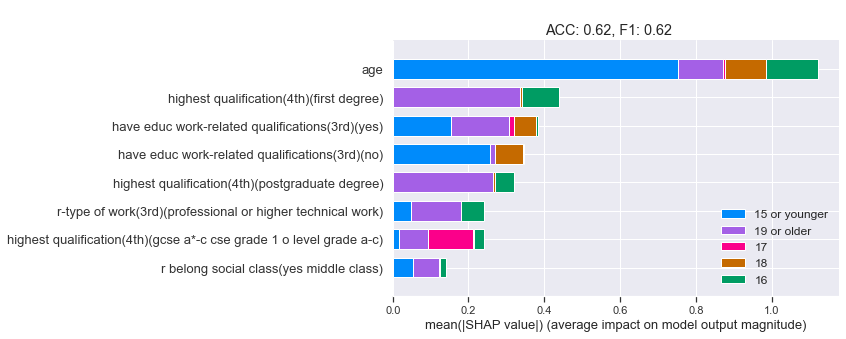

NameError: name 'vote_complete' is not defined

In [49]:
%%time
ge="2010"
age_left_education = f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"]
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] = age_left_education.replace(replace_dict)
#''.replace("OTH",np.nan).replace("PC",np.nan)
mask = age_left_education.isnull()

harm_vars = ["wt","age","housing_det","vote_complete","inc","inc_det","gender_complete","age_left_education"]
target_var = "age_left_education"
target_var_replace_dict = {}
target_var_drop_list = []
target_var_title_pair = None

var_stub = "age_left_education"
min_features = 8
drop_std_thresh = 0
drop_vars = ["aq67","bq95_1","zq95_1"]
specific_vars = []
# drop_vars = drop_vars+[k for k,v in BES_label_list[ge].items() if re.search("v7b|what would be your 2nd choice",v.lower())]

alg = get_xgboost_alg(classification_problem=True)

# find variables with no coverage/variation in focal instances (mask)
df_pred = prep_df_only(ge,target_var,target_var_replace_dict,target_var_drop_list,target_var_title_pair,
       var_stub,harm_vars,min_features,dependence_plots=True,drop_vars=drop_vars,demo_var_only=False,specific_vars=specific_vars)
stds = df_pred[mask].std()
drop_vars = drop_vars + list(stds[stds.isnull()].index)+list(stds[stds<=drop_std_thresh].index)
drop_vars = [x for x in drop_vars if x not in ["wt",var_stub]]

(explainer, shap_values, train_columns, train_index, alg,output_subfolder) = prep_df(ge,target_var,target_var_replace_dict,
                                                                                     target_var_drop_list,target_var_title_pair,
       var_stub,harm_vars,min_features,dependence_plots=False,drop_vars=drop_vars,demo_var_only=False,
                                                        alg=alg,multi_class_target=True,specific_vars=specific_vars)

# setup df back up
df_pred = prep_df_only(ge,target_var,target_var_replace_dict,target_var_drop_list,target_var_title_pair,
       var_stub,harm_vars,min_features,dependence_plots=True,drop_vars=drop_vars,demo_var_only=False)
# use fitted algorithm to predict values
vote_pred = pd.Series(alg.predict(df_pred[train_columns]),index=age_left_education.index)
# income_var_df_sm.loc[income_var_df_sm[ge].isnull(),ge] = pd.Series(inc_pred,index=income_var_df_sm[ge].index).apply(round)[income_var_df_sm[ge].isnull()]

In [50]:
vote_pred = pd.Series(alg.predict(df_pred[train_columns]),index=age_left_education.index)

In [52]:
vote_pred.value_counts()

16               949
19 or older      927
15 or younger    835
18               200
17               164
dtype: int64

In [53]:
age_left_education.isnull().sum()

29

In [54]:
vote_pred[age_left_education.isnull()].value_counts()

19 or older      18
16                9
18                1
15 or younger     1
dtype: int64

In [ ]:
########################################################

In [157]:
BES_df_list[ge]['zq95_1'].value_counts()

16                                            848
19 or older                                   810
15 or younger                                 752
18                                            310
17                                            272
still at university in full-time education     54
still at school in full-time education         25
don't know                                      3
refused                                         1
Name: zq95_1, dtype: int64

In [55]:
f2f_harmonised["age_left_education"] = np.nan


replace_dict = {
    "15 or younger":"15 or younger",
    "16":"16",
    "17":"17",
    "18":"18",
    "19 or older":"19 or older",
    "still at school in full-time education":"Still at school in full-time education",
    "still at university in full-time education":"Still at university in full-time education",
# "Still at school in full-time education", 18+, mostly 18
# "Still at university in full-time education", 18+, 18 but quite a bit over    
    "don't know":np.nan,
    "refused":np.nan,
}
ge = "2010"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] = BES_df_list[ge]['zq95_1'].replace(replace_dict)

replace_dict = {
    1:"15 or younger",
    2:"16",
    3:"17",
    4:"18",
    5:"19 or older",
    6:"Still at school in full-time education",
    7:"Still at university in full-time education",
# 18+, mostly >18
# 18+, mostly 18    
    9:np.nan,
    9999:np.nan,
}
ge = "2005"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] = BES_df_list[ge]['tq81'].replace(replace_dict)

replace_dict = {
    "15 or younger":"15 or younger",
    "16":"16",
    "17":"17",
    "18":"18",
    "19 or older":"19 or older",
    "still in school":"Still at school in full-time education",
# all 18+
    "refused":np.nan,
    "not app":np.nan,
    "don't know":np.nan,
}
ge = "2001"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] = BES_df_list[ge]["bq75b"].replace(replace_dict)

replace_dict = {
    0:"No Schooling",
    97:"Still in full-time education",
    ## all 18+
    "don't   know":np.nan,
    "not     answered":np.nan,
    ## ages run from 8 to 45!
}
ge = "1997"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] = BES_df_list[ge]["tea"].replace(replace_dict)

replace_dict = {
    "no schooling at all":"No Schooling",
    "in full-time education":"Still in full-time education",
    ## all 18+ (still)
    "don't   know":np.nan,
    "not     answered":np.nan,
}
ge = "1992"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] = BES_df_list[ge]["v911"].replace(replace_dict)


replace_dict = {
    "had no schooling":"No Schooling",
    90:"Still in full-time education",
    ## all 18+ (still) ... but one person is 90
    "dont know":np.nan,
    "not answered":np.nan,
}
ge = "1987"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] = BES_df_list[ge]["v55"].replace(replace_dict)


replace_dict = {
    "no schooling":"No Schooling",
#     90:"Still in full-time education",
    ## all 18+ (still) ... but one person is 90
    "dont know":np.nan,
    "not answered":np.nan,
    "still at school":"Still in full-time education",
    # all 18
}
ge = "1983"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] = BES_df_list[ge]["q59a"].replace(replace_dict)

replace_dict = {
    0:"No Schooling",
#     90:"Still in full-time education",
    ## all 18+ (still) ... but one person is 90
#     "dont know":np.nan,
    "dk":np.nan,
    "not answered":np.nan,
    "still at school":"Still in full-time education", # doesn't actually appear
    "still in f-t educatn":"still in f-t educatn",
    # 18, 19
}
# replace_dict = {0:np.nan,"dk":np.nan,"still in f-t educatn":"still in f-t educatn","still at school":"still at school"}
ge = "1979"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] =BES_df_list[ge][['m184239','m000241',]].replace(replace_dict).fillna(method='ffill',axis=1)['m000241'].replace(replace_dict)
#BES_df_list[ge]["m184239"].replace(replace_dict)
# BES_df_list[ge][['m184239','m000241',]].replace(replace_dict).fillna(method='ffill',axis=1)['m000241'].value_counts()
## BUG! # 'm000241': 'age r completed full-time education-q90',

replace_dict = {
#     0:"No Schooling",
#     90:"Still in full-time education",
    ## all 18+ (still) ... but one person is 90
#     "dont know":np.nan,
    "dk":np.nan,
#     "not answered":np.nan,
#     "still at school":"Still in full-time education",
}

ge = "1974_oct"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] = BES_df_list[ge]["oct184"].replace(replace_dict)
# .value_counts(dropna=False)

replace_dict = {
#     0:"No Schooling",
#     90:"Still in full-time education",
    ## all 18+ (still) ... but one person is 90
#     "dont know":np.nan,
    "dk":np.nan,
#     "not answered":np.nan,
#     "still at school":"Still in full-time education",
    # 18, 19
}
ge = "1974_feb"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] = BES_df_list[ge]["feb184"].replace(replace_dict)


BES_df_list[ge]["v851"].value_counts(dropna=False)
replace_dict = {
    1.0:"13 or younger",
    2.0:"14",
    3.0:"15",
    4.0:"16",
    5.0:"17",
    6.0:"18",
    7.0:"19 or older",
    8.0:"No Schooling",
    9.0:np.nan,
    0.0:np.nan
}

ge="1970"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] = BES_df_list[ge]["v851"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"].loc[248] = "16"

ge="1966"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] = BES_df_list[ge]["v851"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"].loc[248] = "16"

ge="1964"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"] = BES_df_list[ge]["v851"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education"].loc[248] = "16"

In [288]:
f2f_harmonised["age_left_education_2"] = np.nan


replace_dict = {'No qualifications':"15 or younger", 'Below GCSE':"15 or younger", 'GCSE':"16", 'A-level':"18", 'Undergraduate':"19 or older",
       'Postgrad':"19 or older","GCSE A*-C":"16","GCSE D-G":"16"}
ge = "2019"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]['edlevel'].replace(replace_dict)
ge = "2017"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]['edlevel'].replace(replace_dict)
ge = "2015"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]['edlevel'].replace(replace_dict)


def get_early_age_groups(x):
    if x =="Still in full-time education":
        return "19 or older"
    elif x== "19 or older":
        return "19 or older"    
    elif x =="No Schooling":
        return "No Schooling"
    elif x<=13.0:
        return "13 or younger"
    elif x>=19.0:
        return "19 or older"
    elif x==14.0:
        return "14"
    elif x==15.0:
        return "15"
    elif x==16.0:
        return "16"
    elif x==17.0:
        return "17"
    elif x==18.0:
        return "18"    
    elif pd.isnull(x):
        return np.nan
    else:
        return "BUG!"
    

replace_dict = {
    "15 or younger":"15 or younger",
    "16":"16",
    "17":"17",
    "18":"18",
    "19 or older":"19 or older",
    "still at school in full-time education":"19 or older",
    "still at university in full-time education":"19 or older",
# "Still at school in full-time education", 18+, mostly 18
# "Still at university in full-time education", 18+, 18 but quite a bit over    
    "don't know":np.nan,
    "refused":np.nan,
}
ge = "2010"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]['zq95_1'].replace(replace_dict)

replace_dict = {
    1:"15 or younger",
    2:"16",
    3:"17",
    4:"18",
    5:"19 or older",
    6:"19 or older",
    7:"19 or older",
# 18+, mostly >18
# 18+, mostly 18    
    9:np.nan,
    9999:np.nan,
}
ge = "2005"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]['tq81'].replace(replace_dict)

replace_dict = {
    "15 or younger":"15 or younger",
    "16":"16",
    "17":"17",
    "18":"18",
    "19 or older":"19 or older",
    "still in school":"19 or older",
# all 18+
    "refused":np.nan,
    "not app":np.nan,
    "don't know":np.nan,
}
ge = "2001"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]["bq75b"].replace(replace_dict)

replace_dict = {
    0:"No Schooling",
    97:"19 or older",
    ## all 18+
    "don't   know":np.nan,
    "not     answered":np.nan,
    ## ages run from 8 to 45!
}
ge = "1997"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]["tea"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))

replace_dict = {
    "no schooling at all":"No Schooling",
    "in full-time education":"19 or older",
    ## all 18+ (still)
    "don't   know":np.nan,
    "not     answered":np.nan,
}
ge = "1992"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]["v911"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))


replace_dict = {
    "had no schooling":"No Schooling",
    90:"19 or older",
    ## all 18+ (still) ... but one person is 90
    "dont know":np.nan,
    "not answered":np.nan,
}
ge = "1987"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]["v55"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))


replace_dict = {
    "no schooling":"No Schooling",
#     90:"Still in full-time education",
    ## all 18+ (still) ... but one person is 90
    "dont know":np.nan,
    "not answered":np.nan,
    "still at school":"19 or older",
    # all 18
}
ge = "1983"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]["q59a"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))

replace_dict = {
    0:"No Schooling",
#     90:"Still in full-time education",
    ## all 18+ (still) ... but one person is 90
#     "dont know":np.nan,
    "dk":np.nan,
    "not answered":np.nan,
    "still at school":"19 or older",
    # 18, 19
}
ge = "1979"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]["m184239"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))


replace_dict = {
#     0:"No Schooling",
#     90:"Still in full-time education",
    ## all 18+ (still) ... but one person is 90
#     "dont know":np.nan,
    "dk":np.nan,
#     "not answered":np.nan,
#     "still at school":"Still in full-time education",
}

ge = "1974_oct"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]["oct184"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))
# .value_counts(dropna=False)

replace_dict = {
#     0:"No Schooling",
#     90:"Still in full-time education",
    ## all 18+ (still) ... but one person is 90
#     "dont know":np.nan,
    "dk":np.nan,
#     "not answered":np.nan,
#     "still at school":"Still in full-time education",
    # 18, 19
}
ge = "1974_feb"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]["feb184"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))


# BES_df_list[ge]["v851"].value_counts(dropna=False)
replace_dict = {
    1.0:"13 or younger",
    2.0:"14",
    3.0:"15",
    4.0:"16",
    5.0:"17",
    6.0:"18",
    7.0:"19 or older",
    8.0:"No Schooling",
    9.0:np.nan,
    0.0:np.nan
}

ge="1970"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]["v851"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"].loc[248] = "16"

ge="1966"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]["v851"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"].loc[248] = "16"

ge="1964"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]["v851"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"].loc[248] = "16"

ge="1959"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"] = BES_df_list[ge]["v851"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_2"].loc[248] = "16"

In [356]:
f2f_harmonised["age_left_education_3"] = np.nan


replace_dict = {'No qualifications':"15 or younger", 'Below GCSE':"15 or younger", 'GCSE':"16", 'A-level':"18", 'Undergraduate':"19 or older",
       'Postgrad':"19 or older","GCSE A*-C":"16","GCSE D-G":"16"}
ge = "2019"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]['edlevel'].replace(replace_dict)
ge = "2017"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]['edlevel'].replace(replace_dict)
ge = "2015"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]['edlevel'].replace(replace_dict)


def get_early_age_groups(x):
    if x =="Still in full-time education":
        return "19 or older"
    elif x== "19 or older":
        return "19 or older"    
    elif x =="No Schooling":
        return "15 or younger"
    elif x=="15 or younger":
        return "15 or younger"
    elif x<=13.0:
        return "15 or younger"
    elif x>=19.0:
        return "19 or older"
    elif x==14.0:
        return "15 or younger"
    elif x==15.0:
        return "15 or younger"
    elif x==16.0:
        return "16"
    elif x==17.0:
        return "18"
    elif x==18.0:
        return "18"    
    elif pd.isnull(x):
        return np.nan
    else:
        return "BUG!"
    

replace_dict = {
    "15 or younger":"15 or younger",
    "16":"16",
    "17":"18",
    "18":"18",
    "19 or older":"19 or older",
    "still at school in full-time education":"19 or older",
    "still at university in full-time education":"19 or older",
# "Still at school in full-time education", 18+, mostly 18
# "Still at university in full-time education", 18+, 18 but quite a bit over    
    "don't know":np.nan,
    "refused":np.nan,
}
ge = "2010"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]['zq95_1'].replace(replace_dict)

replace_dict = {
    1:"15 or younger",
    2:"16",
    3:"18",
    4:"18",
    5:"19 or older",
    6:"19 or older",
    7:"19 or older",
# 18+, mostly >18
# 18+, mostly 18    
    9:np.nan,
    9999:np.nan,
}
ge = "2005"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]['tq81'].replace(replace_dict)

replace_dict = {
    "15 or younger":"15 or younger",
    "16":"16",
    "17":"18",
    "18":"18",
    "19 or older":"19 or older",
    "still in school":"19 or older",
# all 18+
    "refused":np.nan,
    "not app":np.nan,
    "don't know":np.nan,
}
ge = "2001"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]["bq75b"].replace(replace_dict)

replace_dict = {
    0:"15 or younger",
    97:"19 or older",
    ## all 18+
    "don't   know":np.nan,
    "not     answered":np.nan,
    ## ages run from 8 to 45!
}
ge = "1997"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]["tea"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))

replace_dict = {
    "no schooling at all":"15 or younger",
    "in full-time education":"19 or older",
    ## all 18+ (still)
    "don't   know":np.nan,
    "not     answered":np.nan,
}
ge = "1992"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]["v911"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))


replace_dict = {
    "had no schooling":"15 or younger",
    90:"19 or older",
    ## all 18+ (still) ... but one person is 90
    "dont know":np.nan,
    "not answered":np.nan,
}
ge = "1987"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]["v55"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))


replace_dict = {
    "no schooling":"15 or younger",
#     90:"Still in full-time education",
    ## all 18+ (still) ... but one person is 90
    "dont know":np.nan,
    "not answered":np.nan,
    "still at school":"19 or older",
    # all 18
}
ge = "1983"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]["q59a"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))

replace_dict = {
    0:"15 or younger",
#     90:"Still in full-time education",
    ## all 18+ (still) ... but one person is 90
#     "dont know":np.nan,
    "dk":np.nan,
    "not answered":np.nan,
    "still at school":"19 or older",
    # 18, 19
}
ge = "1979"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]["m184239"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))


replace_dict = {
#     0:"No Schooling",
#     90:"Still in full-time education",
    ## all 18+ (still) ... but one person is 90
#     "dont know":np.nan,
    "dk":np.nan,
#     "not answered":np.nan,
#     "still at school":"Still in full-time education",
}

ge = "1974_oct"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]["oct184"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))
# .value_counts(dropna=False)

replace_dict = {
#     0:"No Schooling",
#     90:"Still in full-time education",
    ## all 18+ (still) ... but one person is 90
#     "dont know":np.nan,
    "dk":np.nan,
#     "not answered":np.nan,
#     "still at school":"Still in full-time education",
    # 18, 19
}
ge = "1974_feb"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]["feb184"].replace(replace_dict).apply(lambda x: get_early_age_groups(x))


# BES_df_list[ge]["v851"].value_counts(dropna=False)
replace_dict = {
    1.0:"15 or younger",
    2.0:"15 or younger",
    3.0:"15 or younger",
    4.0:"16",
    5.0:"18",
    6.0:"18",
    7.0:"19 or older",
    8.0:"15 or younger",
    9.0:np.nan,
    0.0:np.nan
}

ge="1970"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]["v851"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"].loc[248] = "16"

ge="1966"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]["v851"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"].loc[248] = "16"

ge="1964"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]["v851"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"].loc[248] = "16"

ge="1959"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"] = BES_df_list[ge]["v851"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age_left_education_3"].loc[248] = "16"

In [357]:
f2f_harmonised["age_left_education_3"].value_counts()

15 or younger    26250
16               10028
19 or older       8148
18                7738
Name: age_left_education_3, dtype: int64

In [290]:
# g =sns.displot(
#     f2f_harmonised, x="bloc_complete", col="dataset", row="age_left_education_2",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )
# g.add_legend()

In [291]:
# row_order = f2f_harmonised["age_left_education_2"].value_counts().sort_index().index
# row_order


# g = sns.catplot(
#     data=f2f_harmonised, kind="count",
#     x="bloc_complete", col="dataset", row="age_left_education_2",
#     row_order = row_order,,
#     ci=None, palette="dark", alpha=.6, height=6
# )

In [296]:
f2f_harmonised.groupby("dataset").apply(get_ct_dataset_counts).drop("No Schooling",axis=1)

age_left_education_2    13 or younger     14     15   16     17   18  \
dataset  bloc_complete                                                 
1959     Left-Lib               173.0  656.0  142.0   66   16.0   16   
         Neither                 36.0  159.0  100.0   44   20.0   21   
         Right-Auth             110.0  429.0  170.0  136   78.0   57   
1964     Left-Lib               185.0  711.0  299.0  105   33.0   30   
         Neither                 45.0  157.0  175.0   52   26.0   30   
         Right-Auth              90.0  386.0  215.0  149   89.0   55   
1966     Left-Lib               144.0  628.0  280.0  107   34.0   37   
         Neither                 43.0  142.0  153.0   40   17.0   13   
         Right-Auth             133.0  482.0  256.0  160   97.0   65   
1970     Left-Lib               120.0  498.0  228.0   83   34.0   28   
         Neither                 73.0  266.0  176.0   52   12.0   14   
         Right-Auth             127.0  492.0  285.0  172  102.0   73   
1974_feb Left-Lib                83.0  527.0  423.0  154   61.0   71   
         Neither                 23.0  100.0   95.0   41   16.0   22   
         Right-Auth              63.0  286.0  179.0  135   80.0   66   
1974_oct Left-Lib                86.0  495.0  393.0  138   63.0   77   
         Neither                 22.0   91.0  129.0   53   23.0   30   
         Right-Auth              53.0  234.0  166.0  143   70.0   54   
1979     Left-Lib                44.0  280.0  254.0  136   41.0   70   
         Neither                 10.0   61.0  111.0   58   13.0   13   
         Right-Auth              34.0  194.0  179.0  174   72.0   78   
1983     Left-Lib                41.0  546.0  493.0  402  128.0  173   
         Neither                 18.0  166.0  167.0  197   45.0   58   
         Right-Auth              38.0  363.0  359.0  354  151.0  184   
1987     Left-Lib                31.0  456.0  443.0  443  110.0  110   
         Neither                 10.0  123.0  127.0  139   31.0   40   
         Right-Auth              18.0  280.0  355.0  326  165.0  120   
1992     Left-Lib                18.0  353.0  458.0  445  138.0   88   
         Neither                  7.0   90.0  113.0  130   47.0   17   
         Right-Auth              11.0  208.0  272.0  353  140.0  111   
1997     Left-Lib                28.0  346.0  473.0  508  159.0  127   
         Neither                  9.0   82.0  170.0  261   70.0   50   
         Right-Auth               6.0  128.0  150.0  198   80.0   88   
2001     Left-Lib                 NaN    NaN    NaN  388  100.0  119   
         Neither                  NaN    NaN    NaN  283   60.0   74   
         Right-Auth               NaN    NaN    NaN  126   51.0   59   
2005     Left-Lib                 NaN    NaN    NaN  481  189.0  165   
         Neither                  NaN    NaN    NaN  346   89.0   94   
         Right-Auth               NaN    NaN    NaN  237   94.0   89   
2010     Left-Lib                 NaN    NaN    NaN  338  117.0  131   
         Neither                  NaN    NaN    NaN  259   60.0   68   
         Right-Auth               NaN    NaN    NaN  246   95.0  110   
2015     Left-Lib                 NaN    NaN    NaN  151    NaN  159   
         Neither                  NaN    NaN    NaN  144    NaN  154   
         Right-Auth               NaN    NaN    NaN  218    NaN  194   
2017     Left-Lib                 NaN    NaN    NaN  117    NaN  158   
         Neither                  NaN    NaN    NaN   72    NaN  106   
         Right-Auth               NaN    NaN    NaN  122    NaN   99   
2019     Left-Lib                 NaN    NaN    NaN  146    NaN  254   
         Neither                  NaN    NaN    NaN   93    NaN  160   
         Right-Auth               NaN    NaN    NaN  208    NaN  265   

age_left_education_2    19 or older  15 or younger  
dataset  bloc_complete                              
1959     Left-Lib                 3            NaN  
         Neither        

In [349]:
# ct_df[ct_df["age_left_education_2"]=="13 or younger"]["dataset"]

In [350]:
# sns.barplot(datact_df[ct_df["age_left_education_2"]=="13 or younger"]

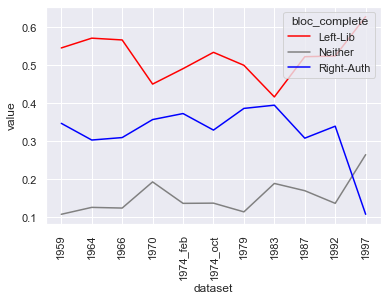

In [328]:
palette = {"Left-Lib":'red',"Right-Auth":'blue',"Neither":'grey'}

sns.lineplot(data=ct_df[ct_df["age_left_education_2"]=="13 or younger"],x="dataset",y="value",hue="bloc_complete",palette=palette);
plt.xticks(rotation=90);

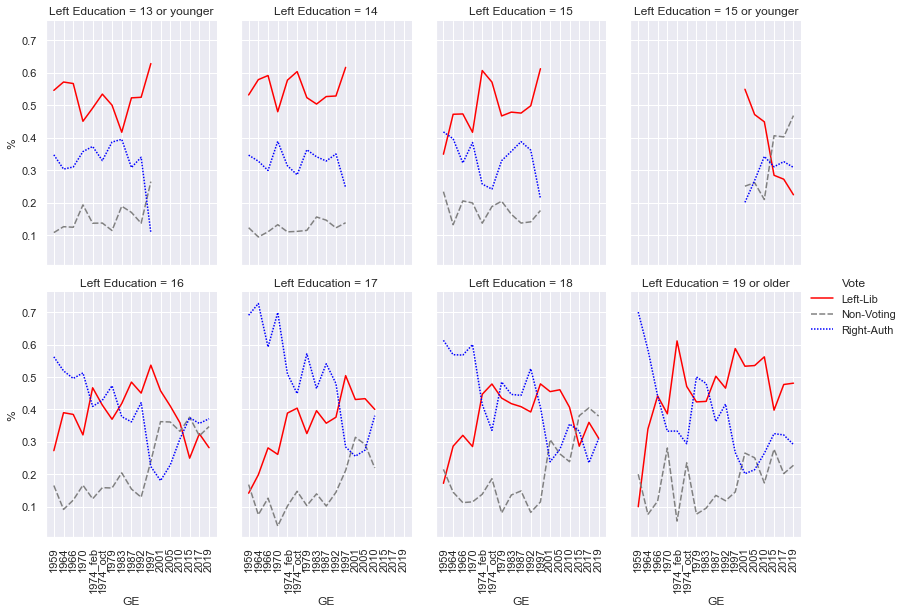

In [360]:
def get_ct_dataset(df):
    return pd.crosstab(df["bloc_complete"],df["age_left_education_2"],values=df["wt"],aggfunc=sum,normalize='columns')

def get_ct_dataset_counts(df):
    return pd.crosstab(df["bloc_complete"],df["age_left_education_2"])
#"age_left_education_2"

ct_df = f2f_harmonised.groupby("dataset").apply(get_ct_dataset)\
    .drop("No Schooling",axis=1).reset_index().melt(id_vars = ["dataset","bloc_complete"])
ct_df["dataset"] = ct_df["dataset"].astype('category').cat.reorder_categories(ct_df["dataset"].value_counts().sort_index().index)
ct_df.columns = ["GE","Vote","Left Education","%"]
ct_df["Left Education"] = ct_df["Left Education"].astype('category')
ct_df = ct_df.replace("Neither","Non-Voting")
palette = {"Left-Lib":'red',"Right-Auth":'blue',"Non-Voting":'grey'}


g=sns.relplot(
    data=ct_df,
    x="GE", y="%",
    hue="Vote", style="Vote", col="Left Education", col_order = ct_df["Left Education"].cat.categories,
    height=4, aspect=.7, kind="line", col_wrap=4,palette=palette
)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

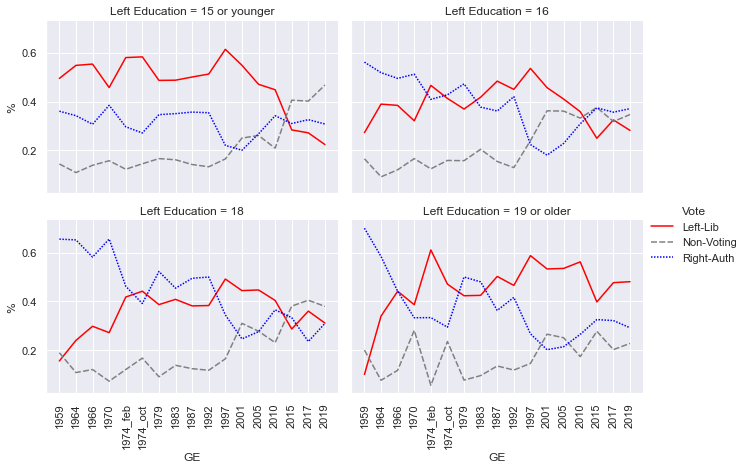

In [365]:
def get_ct_dataset(df):
    return pd.crosstab(df["bloc_complete"],df["age_left_education_3"],values=df["wt"],aggfunc=sum,normalize='columns')

def get_ct_dataset_counts(df):
    return pd.crosstab(df["bloc_complete"],df["age_left_education_3"])
#"age_left_education_2"

ct_df = f2f_harmonised.groupby("dataset").apply(get_ct_dataset)\
    .reset_index().melt(id_vars = ["dataset","bloc_complete"])
ct_df["dataset"] = ct_df["dataset"].astype('category').cat.reorder_categories(ct_df["dataset"].value_counts().sort_index().index)
ct_df.columns = ["GE","Vote","Left Education","%"]
ct_df["Left Education"] = ct_df["Left Education"].astype('category')
ct_df = ct_df.replace("Neither","Non-Voting")
palette = {"Left-Lib":'red',"Right-Auth":'blue',"Non-Voting":'grey'}


g=sns.relplot(
    data=ct_df,
    x="GE", y="%",
    hue="Vote", style="Vote", col="Left Education", col_order = ct_df["Left Education"].cat.categories,
    height=3, aspect=1.5, kind="line", col_wrap=2,palette=palette
)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

In [260]:
ge="2017"
BES_df_list[ge]["edlevel"].replace(replace_dict).value_counts(dropna=False)

19 or older      893
15 or younger    589
18               363
16               311
NaN               38
Name: edlevel, dtype: int64

In [261]:
ge="2015"
BES_df_list[ge]["edlevel"].replace(replace_dict).value_counts(dropna=False)

19 or older      1081
15 or younger     788
16                515
18                509
NaN                94
Name: edlevel, dtype: int64

In [ ]:
## anyQuals

In [701]:
cols = ["rsa_or_city_and_guilds","overseas_other_postschl","overseas_degree","other_academic_vocational","other_tech_business",
"higher_onc_ond_bec_tec","ordinary_gen_onc_ond_bec_tec","trade_appenticeship","nursing","teachers_training",
"city_and_guilds_cert_part1","city_and_guilds_full_tech","city_and_guilds_advanced_final","city_and_guilds_craft_ordinary",
"rsa_other_commercial","school_cert_or_matric","uni_cnaa_degree_or_diploma","os_schl_leav_qual","a_level_scot_higher",
"cse_grade_1_scot_lower","cse_grade_2_5","anyQuals"]
f2f_harmonised[cols]=np.nan

In [718]:
# f2f_harmonised[cols].stack().value_counts(dropna=False)

No     260238
Yes     42253
dtype: int64

In [703]:
ge = "2019"
replace_dict = {"Yes":"Yes","No":"No","Prefer not to say":np.nan,"Not stated":np.nan}
BES_df_list[ge]["y12a"].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"anyQuals"] = BES_df_list[ge]["y12a"].replace(replace_dict)

ge = "2017"
replace_dict = {"Yes":"Yes","No":"No","Prefer not to say":np.nan,"Not stated":np.nan}
BES_df_list[ge]["y12a"].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"anyQuals"] = BES_df_list[ge]["y12a"].replace(replace_dict)

ge = "2015"
replace_dict = {"Yes":"Yes","No":"No",}
BES_df_list[ge]["y12a"].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"anyQuals"] = BES_df_list[ge]["y12a"].replace(replace_dict)

ge = "2010"
replace_dict = {"yes":"Yes","no":"No","don't know":np.nan,"refused":np.nan}
BES_df_list[ge]["zq95_2"].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"anyQuals"] = BES_df_list[ge]["zq95_2"].replace(replace_dict)

ge = "2005"
replace_dict = {1:"Yes",2:"No",9999:np.nan,9:np.nan}
BES_df_list[ge]["tq82a"].replace(replace_dict).value_counts(dropna=False)

ge = "2001"
replace_dict = {"yes":"Yes","no":"No","don't know":np.nan,"refused":np.nan}
BES_df_list[ge][["aq43a","bq76a"]].replace(replace_dict).fillna(method='ffill',axis=1)["bq76a"].value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"anyQuals"] = BES_df_list[ge][["aq43a","bq76a"]].replace(replace_dict).fillna(method='ffill',axis=1)["bq76a"]

ge = "1997"
replace_dict = {"yes":"Yes","no":"No","not     answered":np.nan,"don't   know":np.nan}
schqual = BES_df_list[ge]["schqual"].replace(replace_dict)#.value_counts(dropna=False)
pschqual =BES_df_list[ge]["pschqual"].replace(replace_dict)#.value_counts(dropna=False)
qual = ( (schqual=="Yes")|(pschqual=="Yes") ).replace(True,"Yes").replace(False,"No")
qual.loc[schqual.isnull()&pschqual.isnull()] = np.nan
qual.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"anyQuals"] = qual

ge = "1992"
replace_dict = {"yes":"Yes","no":"No","not     answered":np.nan,"don't   know":np.nan}
schqual = BES_df_list[ge]["v912a"].replace(replace_dict)#.value_counts(dropna=False)
pschqual =BES_df_list[ge]["v913a"].replace(replace_dict)#.value_counts(dropna=False)
qual = ( (schqual=="Yes")|(pschqual=="Yes") ).replace(True,"Yes").replace(False,"No")
qual.loc[schqual.isnull()&pschqual.isnull()] = np.nan
qual.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"anyQuals"] = qual

ge = "1987"
replace_dict = {np.nan:"Yes","no qualification":"No","not answered":np.nan}
BES_df_list[ge]['v56a'].replace(replace_dict).value_counts(dropna=False)
## all the nan values here are Has Qualification!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"anyQuals"] = BES_df_list[ge]['v56a'].replace(replace_dict)

ge = "1983"
replace_dict = {"has qual":"Yes","no qual":"No",}
BES_df_list[ge]['q62a'].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"anyQuals"] = BES_df_list[ge]['q62a'].replace(replace_dict)

ge = "1979"
replace_dict = {"has qual":"Yes","no qual":"No",}
BES_df_list[ge]['m000242'].value_counts(dropna=False)
quals = (BES_df_list[ge]['m000242']=="r has no quals").replace({True:"No",False:"Yes"})

no_clear_inf = ((BES_df_list[ge][['m000242','m000243','m000244','m000245','m000246','m000247',
                 'm000248','m000249','m000250','m000251','m000252',
                ]]!="r has qual").all(axis=1)&(BES_df_list[ge]['m000242']!="r has no quals"))
quals.loc[no_clear_inf]=np.nan
quals.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"anyQuals"] = quals
# here backwards, no variables about qualifications -> have to substitute with 'attended FE' variables

# ge = "1974_oct"

In [704]:
# individual qualifications
## cse_grade_2_5
ge = "1997"
replace_dict = {'skp,no school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
cse_grade_2_5 = BES_df_list[ge]["edqual1"].replace(replace_dict)
cse_grade_2_5.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"cse_grade_2_5"] = cse_grade_2_5

ge = "1992"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
cse_grade_2_5 = BES_df_list[ge]["v912b_01"].replace(replace_dict)
cse_grade_2_5.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"cse_grade_2_5"] = cse_grade_2_5

ge = "1987"
replace_dict = {'has qualification':"Yes"}
cse_grade_2_5 = BES_df_list[ge]["v56b"].replace(replace_dict).astype('object').fillna("No")
cse_grade_2_5.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
cse_grade_2_5.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"cse_grade_2_5"] = cse_grade_2_5

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
cse_grade_2_5 = BES_df_list[ge]["q62b"].replace(replace_dict)
cse_grade_2_5.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"cse_grade_2_5"] = cse_grade_2_5

ge = "1979"
replace_dict = {'r has no quals':"No", "r doesnt have qual":"No", 'r has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
cse_grade_2_5 = BES_df_list[ge]["m000243"].replace(replace_dict)
cse_grade_2_5.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"cse_grade_2_5"] = cse_grade_2_5


## cse_grade_1_scot_lower
ge = "1997"
replace_dict = {'skp,no school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
cse_grade_1_scot_lower = BES_df_list[ge]["edqual2"].replace(replace_dict)
cse_grade_1_scot_lower.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"cse_grade_1_scot_lower"] = cse_grade_1_scot_lower

ge = "1992"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
cse_grade_1_scot_lower = BES_df_list[ge]["v912b_02"].replace(replace_dict)
cse_grade_1_scot_lower.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"cse_grade_1_scot_lower"] = cse_grade_1_scot_lower

ge = "1987"
replace_dict = {'has qualification':"Yes"}
cse_grade_1_scot_lower = BES_df_list[ge]["v56c"].replace(replace_dict).astype('object').fillna("No")
cse_grade_1_scot_lower.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
cse_grade_1_scot_lower.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"cse_grade_1_scot_lower"] = cse_grade_1_scot_lower

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
cse_grade_1_scot_lower = BES_df_list[ge]["q62c"].replace(replace_dict)
cse_grade_1_scot_lower.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"cse_grade_1_scot_lower"] = cse_grade_1_scot_lower

ge = "1979"
replace_dict = {'r has no quals':"No", "r doesnt have qual":"No", 'r has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
cse_grade_1_scot_lower = BES_df_list[ge]["m000244"].replace(replace_dict)
cse_grade_1_scot_lower.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"cse_grade_1_scot_lower"] = cse_grade_1_scot_lower

## a_level_scot_higher
ge = "1997"
replace_dict = {'skp,no school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
a_level_scot_higher = BES_df_list[ge]["edqual3"].replace(replace_dict)
a_level_scot_higher.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"a_level_scot_higher"] = a_level_scot_higher

ge = "1992"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
a_level_scot_higher = BES_df_list[ge]["v912b_03"].replace(replace_dict)
a_level_scot_higher.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"a_level_scot_higher"] = a_level_scot_higher

ge = "1987"
replace_dict = {'has qualification':"Yes"}
a_level_scot_higher = BES_df_list[ge]["v56d"].replace(replace_dict).astype('object').fillna("No")
a_level_scot_higher.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
a_level_scot_higher.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"a_level_scot_higher"] = a_level_scot_higher

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
a_level_scot_higher = BES_df_list[ge]["q62d"].replace(replace_dict)
a_level_scot_higher.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"a_level_scot_higher"] = a_level_scot_higher

ge = "1979"
replace_dict = {'r has no quals':"No", "r doesnt have qual":"No", 'r has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
a_level_scot_higher = BES_df_list[ge]["m000246"].replace(replace_dict)
a_level_scot_higher.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"a_level_scot_higher"] = a_level_scot_higher

## os_schl_leav_qual
ge = "1997"
replace_dict = {'skp,no school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
os_schl_leav_qual = BES_df_list[ge]["edqual4"].replace(replace_dict)
os_schl_leav_qual.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"os_schl_leav_qual"] = os_schl_leav_qual

ge = "1992"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
os_schl_leav_qual = BES_df_list[ge]["v912b_04"].replace(replace_dict)
os_schl_leav_qual.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"os_schl_leav_qual"] = os_schl_leav_qual

ge = "1987"
replace_dict = {'has qualification':"Yes"}
os_schl_leav_qual = BES_df_list[ge]["v56q"].replace(replace_dict).astype('object').fillna("No")
os_schl_leav_qual.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
os_schl_leav_qual.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"os_schl_leav_qual"] = os_schl_leav_qual

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
os_schl_leav_qual = BES_df_list[ge]["q62q"].replace(replace_dict)
os_schl_leav_qual.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"os_schl_leav_qual"] = os_schl_leav_qual

## uni_cnaa_degree_or_diploma
## some ambiguity about diplomas!
# univ, cnaa degree, diploma
# 1983 'diplomas'
# https://www.open.ac.uk/about/validation-partnerships/sites/www.open.ac.uk.about.validation-partnerships/files/files/FAQ%20for%20CNAA%20Students%20(COVID-19).pdf
## these are separate but get merged in 65
ge = "1997"
replace_dict = {'no post school qual':"No", 'does no have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
uni_cnaa_degree_or_diploma = BES_df_list[ge]["edqual15"].replace(replace_dict)
uni_cnaa_degree_or_diploma.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"uni_cnaa_degree_or_diploma"] = uni_cnaa_degree_or_diploma

ge = "1992"
replace_dict = {'skp,no post school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
uni_cnaa_degree_or_diploma = BES_df_list[ge]["v913b_10"].replace(replace_dict)
uni_cnaa_degree_or_diploma.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"uni_cnaa_degree_or_diploma"] = uni_cnaa_degree_or_diploma

ge = "1987"
replace_dict = {'has qualification':"Yes"}
uni_cnaa_degree_or_diploma = BES_df_list[ge]["v56o"].replace(replace_dict).astype('object').fillna("No")
uni_cnaa_degree_or_diploma.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
uni_cnaa_degree_or_diploma.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"uni_cnaa_degree_or_diploma"] = uni_cnaa_degree_or_diploma

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
uni_cnaa_degree_or_diploma = BES_df_list[ge]["q62e"].replace(replace_dict)
# uni_cnaa_degree_or_diploma.loc[BES_df_list[ge]["q62e"].replace(replace_dict)=="Yes"]="Yes"
uni_cnaa_degree_or_diploma.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"uni_cnaa_degree_or_diploma"] = uni_cnaa_degree_or_diploma

# ## uni_degree
# ge = "1983"
# replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
#        "dont know":np.nan, 'not answered':np.nan}
# uni_degree = BES_df_list[ge]["q62e"].replace(replace_dict)
# uni_degree.value_counts(dropna=False)

# ## diploma
# ge = "1983"
# replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
#        "dont know":np.nan, 'not answered':np.nan}
# uni_degree = BES_df_list[ge]["q62p"].replace(replace_dict)
# uni_degree.value_counts(dropna=False)

ge = "1979"
replace_dict = {'r has no quals':"No", "r doesnt have qual":"No", 'r has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
uni_cnaa_degree_or_diploma = BES_df_list[ge]["m000248"].replace(replace_dict)
# uni_cnaa_degree_or_diploma.loc[BES_df_list[ge]["q62e"].replace(replace_dict)=="Yes"]="Yes"
uni_cnaa_degree_or_diploma.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"uni_cnaa_degree_or_diploma"] = uni_cnaa_degree_or_diploma

ge = "1979"
replace_dict = {'r has no quals':"No", "r doesnt have qual":"No", 'r has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
school_cert_or_matric = BES_df_list[ge]["m000245"].replace(replace_dict)
# uni_cnaa_degree_or_diploma.loc[BES_df_list[ge]["q62e"].replace(replace_dict)=="Yes"]="Yes"
school_cert_or_matric.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_cert_or_matric"] = school_cert_or_matric

In [705]:
## rsa_other_commercial
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
rsa_other_commercial = BES_df_list[ge]["edqual6"].replace(replace_dict)
rsa_other_commercial.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"rsa_other_commercial"] = rsa_other_commercial

ge = "1992"
replace_dict = {'skp,no post school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
rsa_other_commercial = BES_df_list[ge]["v913b_02"].replace(replace_dict)
rsa_other_commercial.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"rsa_other_commercial"] = rsa_other_commercial

ge = "1987"
replace_dict = {'has qualification':"Yes"}
rsa_other_commercial = BES_df_list[ge]["v56f"].replace(replace_dict).astype('object').fillna("No")
rsa_other_commercial.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
rsa_other_commercial.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"rsa_other_commercial"] = rsa_other_commercial

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
rsa_other_commercial = BES_df_list[ge]["q62f"].replace(replace_dict)
# rsa_other_commercial.loc[BES_df_list[ge]["q62e"].replace(replace_dict)=="Yes"]="Yes"
rsa_other_commercial.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"rsa_other_commercial"] = rsa_other_commercial

In [706]:
## city_and_guilds_craft_ordinary
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not hve qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
city_and_guilds_craft_ordinary = BES_df_list[ge]["edqual23"].replace(replace_dict)
city_and_guilds_craft_ordinary.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"city_and_guilds_craft_ordinary"] = city_and_guilds_craft_ordinary

ge = "1992"
replace_dict = {'skp,no post school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
city_and_guilds_craft_ordinary = BES_df_list[ge]["v913b_03"].replace(replace_dict)
city_and_guilds_craft_ordinary.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"city_and_guilds_craft_ordinary"] = city_and_guilds_craft_ordinary

ge = "1987"
replace_dict = {'has qualification':"Yes"}
city_and_guilds_craft_ordinary = BES_df_list[ge]["v56g"].replace(replace_dict).astype('object').fillna("No")
city_and_guilds_craft_ordinary.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
city_and_guilds_craft_ordinary.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"city_and_guilds_craft_ordinary"] = city_and_guilds_craft_ordinary

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
city_and_guilds_craft_ordinary = BES_df_list[ge]["q62g"].replace(replace_dict)
city_and_guilds_craft_ordinary.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"city_and_guilds_craft_ordinary"] = city_and_guilds_craft_ordinary

## city_and_guilds_advanced_final
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not hve qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
city_and_guilds_advanced_final = BES_df_list[ge]["edqual24"].replace(replace_dict)
city_and_guilds_advanced_final.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"city_and_guilds_advanced_final"] = city_and_guilds_advanced_final

ge = "1992"
replace_dict = {'skp,no post school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
city_and_guilds_advanced_final = BES_df_list[ge]["v913b_04"].replace(replace_dict)
city_and_guilds_advanced_final.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"city_and_guilds_advanced_final"] = city_and_guilds_advanced_final

ge = "1987"
replace_dict = {'has qualification':"Yes"}
city_and_guilds_advanced_final = BES_df_list[ge]["v56h"].replace(replace_dict).astype('object').fillna("No")
city_and_guilds_advanced_final.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
city_and_guilds_advanced_final.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"city_and_guilds_advanced_final"] = city_and_guilds_advanced_final

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
city_and_guilds_advanced_final = BES_df_list[ge]["q62h"].replace(replace_dict)
city_and_guilds_advanced_final.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"city_and_guilds_advanced_final"] = city_and_guilds_advanced_final

## city_and_guilds_full_tech
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not hve qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
city_and_guilds_full_tech = BES_df_list[ge]["edqual25"].replace(replace_dict)
city_and_guilds_full_tech.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"city_and_guilds_full_tech"] = city_and_guilds_full_tech

ge = "1992"
replace_dict = {'skp,no post school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
city_and_guilds_full_tech = BES_df_list[ge]["v913b_05"].replace(replace_dict)
city_and_guilds_full_tech.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"city_and_guilds_full_tech"] = city_and_guilds_full_tech

ge = "1987"
replace_dict = {'has qualification':"Yes"}
city_and_guilds_full_tech = BES_df_list[ge]["v56i"].replace(replace_dict).astype('object').fillna("No")
city_and_guilds_full_tech.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
city_and_guilds_full_tech.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"city_and_guilds_full_tech"] = city_and_guilds_full_tech

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
city_and_guilds_full_tech = BES_df_list[ge]["q62i"].replace(replace_dict)
city_and_guilds_full_tech.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"city_and_guilds_full_tech"] = city_and_guilds_full_tech

## city_and_guilds_cert_part1
# don't know how this relates to rest of C&G
# but it doesn't appear to be something *every* C&G person gets
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
city_and_guilds_cert_part1 = BES_df_list[ge]["edqual22"].replace(replace_dict)
city_and_guilds_cert_part1.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"city_and_guilds_cert_part1"] = city_and_guilds_cert_part1

In [707]:
## teachers_training
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
teachers_training = BES_df_list[ge]["edqual12"].replace(replace_dict)
teachers_training.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"teachers_training"] = teachers_training

ge = "1992"
replace_dict = {'skp,no post school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
teachers_training = BES_df_list[ge]["v913b_08"].replace(replace_dict)
teachers_training.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"teachers_training"] = teachers_training

ge = "1987"
replace_dict = {'has qualification':"Yes"}
teachers_training = BES_df_list[ge]["v56l"].replace(replace_dict).astype('object').fillna("No")
teachers_training.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
teachers_training.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"teachers_training"] = teachers_training

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
teachers_training = BES_df_list[ge]["q62m"].replace(replace_dict)
teachers_training.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"teachers_training"] = teachers_training

ge = "1979"
replace_dict = {'r has no quals':"No", "r doesnt have qual":"No", 'r has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
teachers_training = BES_df_list[ge]["m000247"].replace(replace_dict)
teachers_training.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"teachers_training"] = teachers_training

In [708]:
## nursing
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
nursing = BES_df_list[ge]["edqual13"].replace(replace_dict)
nursing.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"nursing"] = nursing

ge = "1992"
replace_dict = {'skp,no post school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
nursing = BES_df_list[ge]["v913b_09"].replace(replace_dict)
nursing.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"nursing"] = nursing

ge = "1987"
replace_dict = {'has qualification':"Yes"}
nursing = BES_df_list[ge]["v56m"].replace(replace_dict).astype('object').fillna("No")
nursing.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
nursing.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"nursing"] = nursing

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
nursing = BES_df_list[ge]["q62n"].replace(replace_dict)
nursing.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"nursing"] = nursing

In [709]:
## trade_appenticeship
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
trade_appenticeship = BES_df_list[ge]["edqual5"].replace(replace_dict)
trade_appenticeship.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"trade_appenticeship"] = trade_appenticeship

ge = "1992"
replace_dict = {'skp,no post school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
trade_appenticeship = BES_df_list[ge]["v913b_01"].replace(replace_dict)
trade_appenticeship.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"trade_appenticeship"] = trade_appenticeship

ge = "1987"
replace_dict = {'has qualification':"Yes"}
trade_appenticeship = BES_df_list[ge]["v56e"].replace(replace_dict).astype('object').fillna("No")
trade_appenticeship.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
trade_appenticeship.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"trade_appenticeship"] = trade_appenticeship

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
trade_appenticeship = BES_df_list[ge]["q62l"].replace(replace_dict)
trade_appenticeship.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"trade_appenticeship"] = trade_appenticeship

ge = "1979"
replace_dict = {'r has no quals':"No", "r doesnt have qual":"No", 'r has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
trade_appenticeship = BES_df_list[ge]["m000250"].replace(replace_dict)
trade_appenticeship.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"trade_appenticeship"] = trade_appenticeship

In [710]:
## ordinary_gen_onc_ond_bec_tec
# not 100% certain categories identical, but there's always lower/upper
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
ordinary_gen_onc_ond_bec_tec = BES_df_list[ge]["edqual10"].replace(replace_dict)
ordinary_gen_onc_ond_bec_tec.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"ordinary_gen_onc_ond_bec_tec"] = ordinary_gen_onc_ond_bec_tec

ge = "1992"
replace_dict = {'skp,no post school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
ordinary_gen_onc_ond_bec_tec = BES_df_list[ge]["v913b_06"].replace(replace_dict)
ordinary_gen_onc_ond_bec_tec.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"ordinary_gen_onc_ond_bec_tec"] = ordinary_gen_onc_ond_bec_tec

ge = "1987"
replace_dict = {'has qualification':"Yes"}
ordinary_gen_onc_ond_bec_tec = BES_df_list[ge]["v56j"].replace(replace_dict).astype('object').fillna("No")
ordinary_gen_onc_ond_bec_tec.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
ordinary_gen_onc_ond_bec_tec.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"ordinary_gen_onc_ond_bec_tec"] = ordinary_gen_onc_ond_bec_tec

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
ordinary_gen_onc_ond_bec_tec = BES_df_list[ge]["q62j"].replace(replace_dict)
ordinary_gen_onc_ond_bec_tec.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"ordinary_gen_onc_ond_bec_tec"] = ordinary_gen_onc_ond_bec_tec

In [711]:
## higher_onc_ond_bec_tec
# not 100% certain categories identical, but there's always lower/upper
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
higher_onc_ond_bec_tec = BES_df_list[ge]["edqual11"].replace(replace_dict)
higher_onc_ond_bec_tec.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"higher_onc_ond_bec_tec"] = higher_onc_ond_bec_tec

ge = "1992"
replace_dict = {'skp,no post school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
higher_onc_ond_bec_tec = BES_df_list[ge]["v913b_07"].replace(replace_dict)
higher_onc_ond_bec_tec.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"higher_onc_ond_bec_tec"] = higher_onc_ond_bec_tec

ge = "1987"
replace_dict = {'has qualification':"Yes"}
higher_onc_ond_bec_tec = BES_df_list[ge]["v56k"].replace(replace_dict).astype('object').fillna("No")
higher_onc_ond_bec_tec.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
higher_onc_ond_bec_tec.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"higher_onc_ond_bec_tec"] = higher_onc_ond_bec_tec

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
higher_onc_ond_bec_tec = BES_df_list[ge]["q62k"].replace(replace_dict)
higher_onc_ond_bec_tec.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"higher_onc_ond_bec_tec"] = higher_onc_ond_bec_tec

In [712]:
## other_tech_business
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
other_tech_business = BES_df_list[ge]["edqual14"].replace(replace_dict)
other_tech_business.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"other_tech_business"] = other_tech_business

ge = "1992"
replace_dict = {'skp,no post school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
other_tech_business = BES_df_list[ge]["v913b_11"].replace(replace_dict)
other_tech_business.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"other_tech_business"] = other_tech_business

ge = "1987"
replace_dict = {'has qualification':"Yes"}
other_tech_business = BES_df_list[ge]["v56n"].replace(replace_dict).astype('object').fillna("No")
other_tech_business.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
other_tech_business.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"other_tech_business"] = other_tech_business

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
other_tech_business = BES_df_list[ge]["q62o"].replace(replace_dict)
other_tech_business.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"other_tech_business"] = other_tech_business

In [713]:
## other_academic_vocational
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'other voc/academic':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
other_academic_vocational = BES_df_list[ge]["edqual16"].replace(replace_dict)
other_academic_vocational.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"other_academic_vocational"] = other_academic_vocational

ge = "1992"
replace_dict = {'skp,no post school quals':"No", 0.0:"No", 'has qual':"Yes",
       "dont know":np.nan, 'not answered':np.nan}
other_academic_vocational = BES_df_list[ge]["v913b_12"].replace(replace_dict)
other_academic_vocational.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"other_academic_vocational"] = other_academic_vocational

ge = "1987"
replace_dict = {'has qualification':"Yes"}
other_academic_vocational = BES_df_list[ge]["v56p"].replace(replace_dict).astype('object').fillna("No")
other_academic_vocational.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
other_academic_vocational.value_counts(dropna=False)
## fiddly!
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"other_academic_vocational"] = other_academic_vocational

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
other_academic_vocational = BES_df_list[ge]["q62p"].replace(replace_dict)
other_academic_vocational.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"other_academic_vocational"] = other_academic_vocational

In [714]:
## overseas_degree
ge = "1987"
replace_dict = {'has qualification':"Yes"}
overseas_degree = BES_df_list[ge]["v56r"].replace(replace_dict).astype('object').fillna("No")
overseas_degree.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
overseas_degree.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"overseas_degree"] = overseas_degree

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
overseas_degree = BES_df_list[ge]["q62r"].replace(replace_dict)
overseas_degree.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"overseas_degree"] = overseas_degree

## overseas_other_postschl
ge = "1987"
replace_dict = {'has qualification':"Yes"}
overseas_other_postschl = BES_df_list[ge]["v56s"].replace(replace_dict).astype('object').fillna("No")
overseas_other_postschl.loc[BES_df_list[ge]["v56a"]=="not answered"]=np.nan
overseas_other_postschl.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"overseas_other_postschl"] = overseas_other_postschl

ge = "1983"
replace_dict = {'skp,no school quals':"No", 0.0:"No", 'has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
overseas_other_postschl = BES_df_list[ge]["q62s"].replace(replace_dict)
overseas_other_postschl.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"overseas_other_postschl"] = overseas_other_postschl

In [761]:
# 'edqual17': 'qual obtained: nvq/svq l1/gnvq foundation q922',
# 'edqual18': 'qual obtained: nvq/svq l2/gnvq intermediate q923',
# 'edqual19': 'qual obtained: nvq/svq l3/gnvq advanced q924',
# 'edqual20': 'qual obtained: nvq/svq level 4 q925',
# 'edqual21': 'qual obtained: nvq/svq level 5 q926',
f2f_harmonised[["nvq_sqv_l1","nvq_sqv_l2","nvq_sqv_l3","nvq_sqv_l4","nvq_sqv_l5",]] = np.nan
## nvq_sqv_l1
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
nvq_sqv_l1 = BES_df_list[ge]["edqual17"].replace(replace_dict)
nvq_sqv_l1.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"nvq_sqv_l1"] = nvq_sqv_l1

## nvq_sqv_l2
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
nvq_sqv_l2 = BES_df_list[ge]["edqual18"].replace(replace_dict)
nvq_sqv_l2.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"nvq_sqv_l2"] = nvq_sqv_l2

## nvq_sqv_l3
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
nvq_sqv_l3 = BES_df_list[ge]["edqual19"].replace(replace_dict)
nvq_sqv_l3.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"nvq_sqv_l3"] = nvq_sqv_l3

## nvq_sqv_l4
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
nvq_sqv_l4 = BES_df_list[ge]["edqual20"].replace(replace_dict)
nvq_sqv_l4.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"nvq_sqv_l4"] = nvq_sqv_l4

## nvq_sqv_l5
ge = "1997"
replace_dict = {'no post school qual':"No", 'does not have qual':"No", 'has qualification':"Yes",
       "don't   know":np.nan, 'not     answered':np.nan}
nvq_sqv_l5 = BES_df_list[ge]["edqual21"].replace(replace_dict)
nvq_sqv_l5.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"edqual21"] = nvq_sqv_l5

In [725]:
## rsa_or_city_and_guilds
ge = "1979"
replace_dict = {'r has no quals':"No", "r doesnt have qual":"No", 'r has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
rsa_or_city_and_guilds = BES_df_list[ge]["m000242"].replace(replace_dict)
rsa_or_city_and_guilds.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"rsa_or_city_and_guilds"] = rsa_or_city_and_guilds
##### add amalgamated versions here!
f2f_harmonised.loc[(f2f_harmonised[["city_and_guilds_cert_part1","city_and_guilds_full_tech",
                "city_and_guilds_advanced_final","city_and_guilds_craft_ordinary","rsa_other_commercial"]]=="Yes").any(axis=1),
                   "rsa_or_city_and_guilds"] = "Yes"
f2f_harmonised.loc[(f2f_harmonised[["city_and_guilds_cert_part1","city_and_guilds_full_tech",
                "city_and_guilds_advanced_final","city_and_guilds_craft_ordinary","rsa_other_commercial"]]=="No").all(axis=1),
                   "rsa_or_city_and_guilds"] = "No"



In [731]:
f2f_harmonised[["professional_qualification","spec_qual_gained_at_work","other_qualification"]]=np.nan
ge = "1979"
replace_dict = {'r has no quals':"No", "r doesnt have qual":"No", 'r has qual':"Yes","no":"No","yes":"Yes",
       "dont know":np.nan, 'not answered':np.nan}
# professional_qualification
professional_qualification = BES_df_list[ge]["m000249"].replace(replace_dict)
professional_qualification.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"professional_qualification"] = professional_qualification
# spec_qual_gained_at_work
spec_qual_gained_at_work = BES_df_list[ge]["m000251"].replace(replace_dict)
spec_qual_gained_at_work.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"spec_qual_gained_at_work"] = spec_qual_gained_at_work
# other_qualification
other_qualification = BES_df_list[ge]["m000252"].replace(replace_dict)
other_qualification.value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"other_qualification"] = other_qualification


In [733]:
f2f_harmonised.columns

Index(['dataset', 'uid', 'housing_det', 'housing', 'inc', 'vote', 'year', 'wt',
       'age', 'vote_simple', 'bloc', 'birth_year', 'harmonised_voted',
       'inc_det', 'vote_complete', 'vote_complete_simple', 'bloc_complete',
       'turnout_complete', 'gender', 'gender_complete', 'age_left_education',
       'age_left_education_2', 'age_left_education_3', 'anyQuals',
       'rsa_or_city_and_guilds', 'overseas_other_postschl', 'overseas_degree',
       'other_academic_vocational', 'other_tech_business',
       'higher_onc_ond_bec_tec', 'ordinary_gen_onc_ond_bec_tec',
       'trade_appenticeship', 'nursing', 'teachers_training',
       'city_and_guilds_cert_part1', 'city_and_guilds_full_tech',
       'city_and_guilds_advanced_final', 'city_and_guilds_craft_ordinary',
       'rsa_other_commercial', 'school_cert_or_matric',
       'uni_cnaa_degree_or_diploma', 'os_schl_leav_qual',
       'a_level_scot_higher', 'cse_grade_1_scot_lower', 'cse_grade_2_5',
       'professional_qualification'

In [762]:

ordered_qual_cols = [
       'os_schl_leav_qual',
       'overseas_other_postschl', 'overseas_degree',
       'school_cert_or_matric',       
       'other_academic_vocational', 'other_tech_business',    
       'professional_qualification', 'spec_qual_gained_at_work',
       'other_qualification',
       'youth_training_skillseekers',
       'trade_appenticeship',
       'rsa_or_city_and_guilds',
       'rsa_other_commercial',
       'city_and_guilds_cert_part1',
       'nvq_sqv_l1',
       'city_and_guilds_craft_ordinary',
       "nvq_sqv_l2",
       'cse_grade_2_5',
       'cse_grade_1_scot_lower',
       'ordinary_gen_onc_ond_bec_tec',
       'city_and_guilds_advanced_final',
       "nvq_sqv_l3",
       'a_level_scot_higher',
       'higher_onc_ond_bec_tec',
       'city_and_guilds_full_tech',
       'nvq_sqv_l4','nvq_sqv_l5',
       'nursing', 'teachers_training',
    ### diploma beneath degree
       'uni_cnaa_degree_or_diploma', 
       ]

In [763]:
f2f_harmonised["highest_qualification"] = f2f_harmonised[ordered_qual_cols].apply(lambda x: x.replace("Yes",x.name).replace("No",np.nan)).fillna(method='ffill',axis=1)[ordered_qual_cols[-1]]\
#     .value_counts()

In [809]:
ge = "2001"
# when in doubt over merged groups, default to lowest!
replace_dict = {
                  'university or cnaa first degree (eg ba, b.sc, b.ed)':"uni_cnaa_degree_or_diploma",
                  'cse grade 1, gce o level, gcse, school certificate':"cse_grade_1_scot_lower",
                # interesting that they include "school certificate"
                  'city and guilds certificate - advanced/final/part 2/ or scot':"city_and_guilds_advanced_final",
                  'city and guilds certificate - craft/intermediate/ordinary/pa':"city_and_guilds_craft_ordinary",
                  'university or cnaa higher degree (eg m.sc, ph.d)':"uni_cnaa_postgrad",
                  'university or cnaa higher degree (eg ma,m.sc, ph.d)':"uni_cnaa_postgrad",
                  'gce a level or higher certificate':"a_level_scot_higher",
                  'certificate or higher diploma /or nvq4/svq4':"nvq_sqv_l4",
                  'scottish ordinary/ lower certificate':"cse_grade_1_scot_lower",
                  'modules/ or nvq1/svq2':"nvq_sqv_l1",
                  'teaching qualification (not degree)':"teachers_training",
                  'clerical and commercial qualifications (eg typing/shorthand,':"rsa_other_commercial",
                  'clerical and commercial qualifications (eg typing/shorthand)':"rsa_other_commercial",
                  'other technical, professional or higher qualification':"other_tech_business",
                  'university diploma':"uni_cnaa_degree_or_diploma",
                ### not so sure about this one!
                  'ordinary national certificate (onc) or diploma (ond), bec/te':"ordinary_gen_onc_ond_bec_tec",
                  'recognized trade apprenticeship completed':"trade_appenticeship",
                  'nursing qualification (eg sen, srn, scm, rgn)':"nursing",
                  'scottish higher certificate':"a_level_scot_higher",
                  'cse grades 2-5':"cse_grade_2_5",
                  'youth training certificate/skillseekers':"youth_training_skillseekers",
                  'not app':np.nan,
                  "don't know":np.nan,                
                  'refused':np.nan,
                  'refused, not app':np.nan,
                }
# BES_df_list[ge]["bq76b"].replace(replace_dict).value_counts(dropna=False)
BES_df_list[ge][["aq43b","bq76b"]].replace(replace_dict).fillna(method='ffill',axis=1)["bq76b"].value_counts(dropna=False)
# BES_df_list[ge]["aq43b"].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"highest_qualification"] = BES_df_list[ge][["aq43b","bq76b"]].replace(replace_dict).fillna(method='ffill',axis=1)["bq76b"]

replace_dict = {
    1:"uni_cnaa_postgrad",
    2:"uni_cnaa_degree_or_diploma",
    3:"uni_cnaa_degree_or_diploma",
#     Univ/poly diploma,
    ## should these be separated????
    4:"teachers_training",
    5:"nursing",
    6:"higher_onc_ond_bec_tec",
    #HNC/HND, City&Guilds level 4, NVQ/SVQ 4/5
    7:"a_level_scot_higher",
    8:"a_level_scot_higher",
    #Scottish Higher and equiv
    9:"nvq_sqv_l3",
    #ONC/OND, City&Guilds level 3, NVQ/SVQ 3
    10:"cse_grade_1_scot_lower",
    #GCSE A*-C, CSE grade 1, O level grade A-C
    11:"cse_grade_1_scot_lower",
    #Scottish Standard grades, Ordinary bands
    12:"cse_grade_2_5",
    #GCSE D-G, CSE grades 2-5, O level D-E
    13:"nvq_sqv_l2",
    #City&Guilds level 2, NVQ/SVQ 2 and equiv
    14:"nvq_sqv_l1",
    #City&Guilds level 1, NVQ/SVQ 1 and equiv
    15:"rsa_other_commercial",
    #Clerical and commercial qualifications
    16:"trade_appenticeship",
    #Recognised trade apprenticeship
    17:"youth_training_skillseekers",
    #Youth training certificate, skill seekers
    18:"other_tech_business",
    ## technically a broader "other" category!
    #Other technical, professional or higher qualification (WRITE IN)
    9999:np.nan,
    99:np.nan
}
ge = "2005"
BES_df_list[ge]["tq82b"].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"highest_qualification"] = BES_df_list[ge]["tq82b"].replace(replace_dict)
replace_dict = {
  'first degree':"uni_cnaa_degree_or_diploma",
  'gcse a*-c cse grade 1 o level grade a-c':"cse_grade_1_scot_lower",
  'hnc/hnd city&guilds level 4 nvq/svq 4/5':"higher_onc_ond_bec_tec",
  'postgraduate degree':"uni_cnaa_postgrad",
  'a level or equivalent':"a_level_scot_higher",
  'onc/ond city&guilds level 3 nvq/svq 3':"nvq_sqv_l3",
  'city&guilds level 2 nvq/svq 2 or equivalent':"nvq_sqv_l2",
  'other technical professional or higher qualification (write ':"other_tech_business",
  'univ/poly diploma':"uni_cnaa_degree_or_diploma",
  'nursing qualification':"nursing",
  'gcse d-g cse grades 2-5 o level d-e':"cse_grade_2_5",
  'clerical and commercial qualifications':"rsa_other_commercial",
  'recognised trade apprenticeship':"trade_appenticeship",
  'teaching qualification':"teachers_training",
  'city&guilds level 1 nvq/svq 1 or equivalent':"nvq_sqv_l1",
  'scottish higher or equivalent':"a_level_scot_higher",
  'scottish standard grades ordinary bands':"cse_grade_1_scot_lower",
  "don't know":np.nan,
  'youth training certificate skill seekers':"youth_training_skillseekers",
  'refused':np.nan,
}
ge = "2010"
BES_df_list[ge]["zq95_3"].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"highest_qualification"] = BES_df_list[ge]["zq95_3"].replace(replace_dict)
replace_dict = {
  'No qualification':np.nan,
  'First degree':"uni_cnaa_degree_or_diploma",
  'GCSE A*-C, CSE grade 1, O level grade A-C':"cse_grade_1_scot_lower",
  'HNC/HND, City&Guilds level 4, NVQ/SVQ 4/5':"higher_onc_ond_bec_tec",
  'Postgraduate degree':"uni_cnaa_postgrad",
  'A level or equivalent':"a_level_scot_higher",
  'ONC/OND, City&Guilds level 3, NVQ/SVQ 3':"nvq_sqv_l3",
  'City&Guilds level 2, NVQ/SVQ 2 and equivalent':"nvq_sqv_l2",
  "City&Guilds level 2, NVQ/SVQ 2 and equiv":"nvq_sqv_l2",
  'Univ/poly diploma':"uni_cnaa_degree_or_diploma",
  "University/Polytechnic diploma":"uni_cnaa_degree_or_diploma",
  'Other technical, professional or higher qualification':"other_tech_business",
  'GCSE D-G, CSE grades 2-5, O level D-E':"cse_grade_2_5",
  'Teaching qualification':"teachers_training",
  'Nursing qualification':"nursing",
  "City&Guilds level 1, NVQ/SVQ 1 and equiv":"nvq_sqv_l1",
  'City&Guilds level 1, NVQ/SVQ 1 and equivalent':"nvq_sqv_l1",
  'Recognised trade apprenticeship':"trade_appenticeship",
  'Clerical and commercial qualifications':"rsa_other_commercial",
  'Scottish Higher or equivalent':"a_level_scot_higher",
  'Scottish Standard grades, Ordinary bands':"cse_grade_1_scot_lower",
  'Youth training certificate, skill seekers':"youth_training_skillseekers",   
  'AAT/ACA/ Accountancy qualifications':"higher_onc_ond_bec_tec",
    ## looking this up online it seems to be equivalent to HNC
    ## but note the incoherence with binning all "other qualifications" at low level!
  "hgv":"rsa_other_commercial",
    ## even more dubious guess pigeon-holing! Seems like "other commercial" to me
  "Refused":np.nan,
  "Prefer not to say":np.nan,
  "None of these":np.nan,
  "Don't know":np.nan,
}
ge = "2015"
BES_df_list[ge]["education"].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"highest_qualification"] = BES_df_list[ge]["education"].replace(replace_dict)
ge = "2017"
BES_df_list[ge]["education"].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"highest_qualification"] = BES_df_list[ge]["education"].replace(replace_dict)
ge = "2019"
BES_df_list[ge]["education"].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"highest_qualification"] = BES_df_list[ge]["education"].replace(replace_dict)

In [785]:
BES_df_list[ge][["aq43a","bq76a"]].replace(replace_dict).fillna(method='ffill',axis=1)["bq76a"].value_counts(dropna=False)

yes    1922
no     1096
NaN      12
Name: bq76a, dtype: int64

In [823]:
ge="2015"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"highest_qualification"]

index
0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                   ...            
2982             uni_cnaa_postgrad
2983    uni_cnaa_degree_or_diploma
2984           a_level_scot_higher
2985    uni_cnaa_degree_or_diploma
2986             uni_cnaa_postgrad
Name: highest_qualification, Length: 2987, dtype: object

In [807]:
f2f_harmonised["highest_qualification"].value_counts()

cse_grade_1_scot_lower            2079
cse_grade_2_5                     1497
uni_cnaa_degree_or_diploma        1193
a_level_scot_higher               1150
trade_appenticeship                555
higher_onc_ond_bec_tec             391
teachers_training                  380
nursing                            360
city_and_guilds_advanced_final     338
rsa_other_commercial               336
ordinary_gen_onc_ond_bec_tec       303
city_and_guilds_craft_ordinary     286
city_and_guilds_full_tech          236
other_academic_vocational          161
other_tech_business                143
other_qualification                112
rsa_or_city_and_guilds             108
os_schl_leav_qual                   66
spec_qual_gained_at_work            53
city_and_guilds_cert_part1          43
professional_qualification          40
school_cert_or_matric               31
nvq_sqv_l3                          30
overseas_degree                     23
nvq_sqv_l4                          13
overseas_other_postschl  

In [ ]:
# edlevel            education                                    
# No qualifications  No qualification                                 489
# Below GCSE         GCSE D-G, CSE grades 2-5, O level D-E             65
#                    Clerical and commercial qualifications            35
# GCSE               GCSE A*-C, CSE grade 1, O level grade A-C        233
#                    City&Guilds level 1, NVQ/SVQ 1 and equivalent     37
#                    Recognised trade apprenticeship                   30
#                    Scottish Standard grades, Ordinary bands          11
# A-level            A level or equivalent                            138
#                    ONC/OND, City&Guilds level 3, NVQ/SVQ 3          120
#                    City&Guilds level 2, NVQ/SVQ 2 and equivalent     94
#                    Scottish Higher or equivalent                     11
# Undergraduate      First degree                                     335
#                    HNC/HND, City&Guilds level 4, NVQ/SVQ 4/5        178
#                    Univ/poly diploma                                 80
#                    Teaching qualification                            45
#                    Nursing qualification                             45
# Postgrad           Postgraduate degree                              210

In [821]:
# "nvq_sqv_l1","nvq_sqv_l2","nvq_sqv_l3","nvq_sqv_l4","nvq_sqv_l5"

edlevel_dict = {
       'overseas_other_postschl':"A-level",
       'overseas_degree':"Undergraduate",    
       'other_academic_vocational':"Undergraduate",
       'other_tech_business':"A-level",    
       'professional_qualification':"A-level",
       'spec_qual_gained_at_work':"A-level",
       'other_qualification':"A-level",
       'rsa_or_city_and_guilds':"Below GCSE",    
    ## above basically guessed!
       'os_schl_leav_qual':"Below GCSE",
       'school_cert_or_matric':"Below GCSE",       
       'trade_appenticeship':"GCSE",
       'rsa_other_commercial':"Below GCSE",
       'nvq_sqv_l1':"GCSE",
       'city_and_guilds_cert_part1':"GCSE", 
       'city_and_guilds_craft_ordinary':"A-level",
       'cse_grade_1_scot_lower':"GCSE",
       "nvq_sqv_l2":"A-level",
       'cse_grade_2_5':"Below GCSE",
       'ordinary_gen_onc_ond_bec_tec':"A-level",
       'city_and_guilds_advanced_final':"A-level",
       'a_level_scot_higher':"A-level",
       "nvq_sqv_l3":"A-level",
       'higher_onc_ond_bec_tec':"Undergraduate",
       'city_and_guilds_full_tech':"Undergraduate",
       'nursing':"Undergraduate",
       'teachers_training':"Undergraduate",
       "nvq_sqv_l4":"Undergraduate",
       "nvq_sqv_l5":"Undergraduate",
    ### diploma beneath degree
       'uni_cnaa_degree_or_diploma':"Undergraduate",
       "uni_cnaa_postgrad":"Postgrad",
       "youth_training_skillseekers":"No qualifications",
       np.nan:"No qualifications",
}

In [814]:
f2f_harmonised["highest_qualification"].replace(edlevel_dict).value_counts(dropna=False)

NaN                  28705
Undergraduate         7974
A-level               6311
GCSE                  5307
Below GCSE            2947
Postgrad              1462
No qualifications       25
Name: highest_qualification, dtype: int64

In [824]:
f2f_harmonised.replace(edlevel_dict).groupby("dataset")["highest_qualification"].value_counts().tail(50)

dataset  highest_qualification
1987     GCSE                      672
         Undergraduate             630
         A-level                   532
         Below GCSE                419
1992     No qualifications        1274
         Undergraduate             652
         A-level                   561
         Below GCSE                530
         GCSE                      517
1997     No qualifications        1259
         Undergraduate             707
         GCSE                      659
         A-level                   593
         Below GCSE                397
2001     No qualifications        1139
         A-level                   704
         Undergraduate             545
         GCSE                      366
         Below GCSE                152
         Postgrad                  124
2005     No qualifications        1256
         Undergraduate            1029
         A-level                   816
         GCSE                      640
         Postgrad                

In [ ]:
### 1959-1970

In [825]:
BES_df_list["1970"]["v856"].value_counts().sort_index()

# DID YOU HAVE ANY FULL TIME/PART TIME EDUCATION AFTER LEAVING SCHOOL?
# . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
# 1. YES
# 5. NO
# 9. RESPONDENT NOT INTERVIEWED IN 1970
# 0. NA

# anyFE

0.0      25
1.0     768
5.0    1563
9.0     566
Name: v856, dtype: int64

In [826]:
BES_label_list["1970"]["v857a"], BES_label_list["1970"]["v857b"]

('POST-SCHOOL EDUC MR2 (1)', 'POST-SCHOOL EDUC MR2 (2)')

In [ ]:
BES_df_list["1970"]["v857a"].value_counts().sort_index()

In [ ]:
BES_df_list["1970"]["v857b"].value_counts().sort_index()

In [858]:



# 1. University
    # university
# 2. 63-Technical college, teacher training college, articled professional training,
#     64-technical college, teacher training college, articled professional training, courses at technical college, nursing
    # tech_college_teacher_nursing
# 3. College of commerce
    # college_of_commerce
# 4. 63-Apprenticeship
#     64-Apprenticeship, military apprenticeship
    # trade_military_apprent
# 5. Art school
    # art_school
# 6. 63-Night school, night classes, evening institutes
#     64-Night school, night classes, evening institutes, day release, sandwich courses, continuation courses
    # night_school
# 7. Summer schools, correspondence courses
    # summer_schl_corresp_courses
# 9. Other
    # other
# 0 None; DK; NA; IMAP; Respondent first interviewed in 1966

In [901]:
ge = "1970"

att_cols = ['att_university',
 'att_commercial_training',
 'att_polytech_or_techcollege',
 'att_night_school',
 'att_non_voc_training',
 'att_other',
 'att_art_school',
 'att_college_of_commerce',
 'att_teacher_training',
 'att_trade_military_apprent',
 'att_tech_college_teacher_nursing',
 'att_tech_or_occ_training',
 'att_summer_schl_corresp_courses',
 'att_NoFE']

f2f_harmonised[att_cols] = np.nan

replace_dict = {0:np.nan,1:"att_university",2:"att_tech_college_teacher_nursing",3:"att_college_of_commerce",
               4:"att_trade_military_apprent",5:"att_art_school",6:"att_night_school",7:"att_summer_schl_corresp_courses",
               9:"att_other"}
postsch_ed = BES_df_list[ge][["v857a","v857b"]].replace(0,9999).min(axis=1).replace(9999,np.nan).replace(replace_dict)
# postsch_ed.value_counts(dropna=False)
postsch_ed.loc[ (BES_df_list[ge]["v856"]==5) & postsch_ed.isnull() ] = "att_NoFE"
postsch_ed.loc[ (BES_df_list[ge]["v853"]==1) & postsch_ed.isnull() ] = "att_university"
postsch_ed.loc[ (BES_df_list[ge]["v853"]==4) & postsch_ed.isnull() ] = "att_polytech_or_techcollege"

postsch_ed.value_counts(dropna=False)
nulls = postsch_ed.isnull()
postsch_ed = pd.get_dummies(postsch_ed).replace({0:"No",1:"Yes"})
postsch_ed.loc[nulls,:] = np.nan

f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,postsch_ed.columns] = postsch_ed

In [1065]:
f2f_harmonised["dataset"].value_counts().sort_index()
## should copy this back over 70/66/64/59?

1959        2922
1964        2922
1966        2922
1970        2922
1974_feb    2462
1974_oct    2365
1979        1893
1983        3955
1987        3826
1992        3534
1997        3615
2001        3030
2005        4161
2010        3075
2015        2987
2017        2194
2019        3946
Name: dataset, dtype: int64

In [1204]:
replace_dict = {
    "university":"att_university",
    "polytechnic or tech":"att_polytech_or_techcollege",
    "polytechnic":"att_polyteche",
    "teacher training":"att_teacher_training",
    "commercial":"att_commercial_training", 
    "comml-secretarial":"att_commercial_training", # commercial or secretarial training
    "occupational":"att_tech_or_occ_training",
    "technical":"att_tech_or_occ_training", # technical college, full or part-time
    "forces":"att_forces_training",
    "non-vocational":"att_non_voc_training", #non-vocational/recreational evening classes
    "other":"att_other",
    "unclassifiable":np.nan,
    "dk":np.nan,
    "none":"att_NoFE",
}

ge = "1974_feb"
BES_df_list[ge]["feb186"][BES_df_list[ge]["feb185"]=="yes"].value_counts()

att_fe = BES_df_list[ge]["feb186"].replace(replace_dict)
att_fe.loc[BES_df_list[ge]["feb185"]=="no"] = "att_NoFE"
# pd.get_dummies(att_fe).columns

nulls = att_fe.isnull()
att_fe = pd.get_dummies(att_fe).replace({0:"No",1:"Yes"})
att_fe.loc[nulls,:] = np.nan
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,att_fe.columns] = att_fe

ge = "1974_oct"
BES_df_list[ge]["oct185a"].value_counts()

att_fe = BES_df_list[ge]["oct185a"].replace(replace_dict)
att_fe.value_counts(dropna=False)
att_fe = pd.get_dummies(att_fe)
nulls = att_fe.isnull()
att_fe = pd.get_dummies(att_fe).replace({0:"No",1:"Yes"})
att_fe.loc[nulls,:] = np.nan
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,att_fe.columns] = att_fe

####
ge = "1979"
# 'm185a315': 'further education and type'


ge = "1983"
# 'q61a': 'did r have further education, & type',
### type here is just "uni/polytechni vs other college"
BES_df_list[ge]["q61a"].value_counts(dropna=False)
# no more 'attend FE' variables (except 'age finish full-time ed' & 'qualification' variables!)
# never               2960
# in past other        541
# in past univ etc     359
# now univ etc          45
# now     other         30
# NaN                   15
# still at school        5

never               2960
in past other        541
in past univ etc     359
now univ etc          45
now     other         30
NaN                   15
still at school        5
Name: q61a, dtype: int64

In [1218]:
## can we use attendance to infer qualifications?
# BES_df_list[ge]["m185a315"]

In [1214]:
ge = "1979"
f2f_harmonised[f2f_harmonised["dataset"]==ge]["highest_qualification"].groupby(BES_df_list[ge]["m185a315"]).value_counts().tail(50)

# hmmm

m185a315              highest_qualification     
technical college     school_cert_or_matric          1
apprenticeship        trade_appenticeship           45
                      rsa_or_city_and_guilds        20
                      cse_grade_1_scot_lower        17
                      cse_grade_2_5                  9
                      spec_qual_gained_at_work       3
                      a_level_scot_higher            2
                      other_qualification            1
other technical or t  trade_appenticeship            8
                      cse_grade_2_5                  7
                      other_qualification            7
                      cse_grade_1_scot_lower         6
                      spec_qual_gained_at_work       5
                      rsa_or_city_and_guilds         3
                      a_level_scot_higher            1
                      professional_qualification     1
                      teachers_training              1
other vocational

In [1202]:
ge = "1979"
BES_df_list[ge]["m185a315"].value_counts(dropna=False)

replace_dict = {
    "university":"att_university",
    "polytechnic or tech":"att_polytech_or_techcollege",
    "technical college":"att_polytech_or_techcollege", ## argh, maybe I also want to separate these???
    "polytechnic":"att_polytech",
    "teacher training":"att_teacher_training",
    "commercial":"att_commercial_training", 
    "commercial & secreta":"att_commercial_training",
    "comml-secretarial":"att_commercial_training", # commercial or secretarial training
    
    "apprenticeship":"att_tech_or_occ_training",
    "other vocational":"att_tech_or_occ_training",
    "agricultural college":"att_tech_or_occ_training",  
    "other technical or t":"att_tech_or_occ_training",  ,
    "art college": "att_art_school",
    "nurse training":"att_nurse_training",
    "teacher training":"att_teacher_training",
    
    "occupational":"att_tech_or_occ_training",
    "technical":"att_tech_or_occ_training", # technical college, full or part-time
    "forces":"att_forces_training",
    "non-vocational":"att_non_voc_training", #non-vocational/recreational evening classes
    "other":"att_other",
    "unclassifiable":np.nan,
    "dk":np.nan,
    13:np.nan
    "none":"att_NoFE",
    "na or none":"att_NoFE",
    "never":"att_NoFE",
    "still at school":np.nan,
    "in past univ etc":"att_university_polytech",
    "now univ etc"::"att_university_polytech",    
    "in past other":"att_othercollege",## how broad is this???
    "now     other":"att_othercollege",

    
}
# never               2960
# in past other        541
# in past univ etc     359
# now univ etc          45
# now     other         30
# NaN                   15
# still at school        5 -> anySchl



att_cols = ['att_university',
 'att_commercial_training',
 'att_polytech_or_techcollege',
 'att_night_school',
 'att_non_voc_training',
 'att_other',
 'att_art_school',
 'att_college_of_commerce',
 'att_teacher_training',
 'att_trade_military_apprent',
 'att_tech_college_teacher_nursing',
 'att_tech_or_occ_training',
 'att_summer_schl_corresp_courses',
 'att_NoFE']

na or none              1036
technical college        201
commercial & secreta     115
university               107
apprenticeship            98
other vocational          85
teacher training          55
other technical or t      50
polytechnic               43
nurse training            37
non-vocational            37
art college               13
13                        12
agricultural college       4
Name: m185a315, dtype: int64

In [1067]:
ge="1970"

#     1:"schl_university",
#     2:"feepayingpubschl",
#     3:"grammar_and_seniorsecondary",
#     4:"schl_technicalcollege",

0       5.0
1       5.0
2       5.0
3       4.0
4       5.0
       ... 
2917    5.0
2918    5.0
2919    0.0
2920    5.0
2921    3.0
Name: v853, Length: 2922, dtype: float64

In [1044]:
ge = "1964"
replace_dict = {
    0:np.nan,
    9:np.nan,
    1:"schl_university",
    2:"feepayingpubschl",
    3:"grammar_and_seniorsecondary",
    4:"schl_technicalcollege",
    5:"elementary_secondarymodern_technical_central_highergrade_church",
    6:"commercialprivate",
    8:"other", 
}
school_type_64 = BES_df_list[ge]["v853"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_type"] = school_type_64
school_type_64.value_counts()
ge = "1970"
replace_dict = {
    0:np.nan,
    1:"secondarymodern_elementary_church_juniorsecondary",
    2:"comprehensive",
    3:"technical_central_intermediate_highergrade",
    4:"grammar_countyhigh_seniorsecondary_directgrant",
    5:"feepayingpubschl",
    6:"commercialprivate",
    8:"other", 
}
school_type_70 = BES_df_list[ge]["v854"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_type"] = school_type_70
school_type_70.value_counts()

ge = "1974_feb"
replace_dict = {
    "elementary":"elementary_primary",
    "secondary modern":"secondarymodern_juniorsecondary",
    "grammar":"grammar_countyhigh_seniorsecondary_highergrade",
    "central":"central_intermediate_senior_council",
    # council = county (not-high)
    "fee-paying":"feepayingpubschl",
    "other":"other",
    "comprehensive":"comprehensive",
    "technical":"technical",
    "commercial private":"commercialprivate",
    "direct grant":"directgrant_grantaided",
    "all age":"allage_advanceddivisions",
    "special":"specialforhandicapped",
}

school_type_74_feb = BES_df_list[ge]["feb183"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_type"] = school_type_74_feb
school_type_74_feb.value_counts()

ge = "1974_oct"
replace_dict = {
    "elementary":"elementary_primary",
    "secondary modern":"secondarymodern_juniorsecondary",
    "grammar":"grammar_countyhigh_seniorsecondary_highergrade",
#     "central":"central_intermediate_senior_council",
    "fee-paying":"feepayingpubschl",
    "other":"other",
    "comprehensive":"comprehensive",
    "technical":"technical",
    "commercial private":"commercialprivate",
    "direct grant":"directgrant_grantaided",
    "all age":"allage_advanceddivisions",
    "special":"specialforhandicapped",
    "abroad":"schl_abroad",
    "convent etc non-sel":"convent_denom_nonselective",
    "convent etc selctve":"convent_denom_selective",
}


school_type_74_oct = BES_df_list[ge]["oct183"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_type"] = school_type_74_oct
school_type_74_oct.value_counts()
### some issues here!
ge = "1979"
replace_dict = {
    "elementary or primar":"elementary_primary",
    "higher elementary":"higherelementary",
    "secondary modern":"secondarymodern",
    "grammer":"grammar",
    "high school or secon":"countyhigh",
    "senior secondary":"seniorsecondary",
    "junior secondary":"juniorsecondary",
    "fee-paying":"feepayingpubschl",
    "independent":"feepayingindependent",
    "other":"other",
    "comprehensive":"comprehensive",
    "technical":"technical",
    "commercial private":"commercialprivate",
    "direct grant":"directgrant_grantaided",
    "all-age school":"allage",
    "special":"specialforhandicapped",
    "abroad-elementary":"schl_abroad_elementary",
    "abroad-state seconda":"schl_abroad_statesecondary",
    "abroad-private secon":"schl_abroad_privatesecondary",
    "convent non-selectiv":"convent_denom_nonselective",
    "convent selective":"convent_denom_selective",
    "central school":"central",
    "county school":"county",
    "abroad n.o.s.":"abroad_nos", # national overseas scholarship? India, for lower castes
    "other u.k. school":"other_uk",
    "special school":"specialforhandicapped",
    "public school":"feepayingpubschl",
    
    ## county school = school set up by local education authority
#     https://en.wikipedia.org/wiki/Local_education_authority_in_England#History
    # setup in 1902 each countil council/county borough council would set up an lea
    # they take over powers/resp of 'school boards' & 'technical instruction committees'
    # (municipal boroughs/urban districts >10k/20k were to be lea for elementary education only)
    # add resp for school meals in 1906/medical inspection 1907
    # 1904 London Countil Council replaces London School Board (some semi arrnagement with metropolitan boroughs??!)
    
    
}
school_type_79 = BES_df_list[ge]["m183314"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_type"] = school_type_79
school_type_79.value_counts()


ge = "1983"
replace_dict = {
    "primary etc":"elementary_primary",
    "higher elementary":"higherelementary",
    "secondy modern":"secondarymodern",
    "secondary modern":"secondarymodern",
#     "grammer":"grammar",
    "grammar":"grammar",
#     "high school or secon":"????",
    "senior  secondy":"seniorsecondary",
    "junior  secondy":"juniorsecondary",
    "indep   fee pay":"feepayingpubschl",
#     "independent":"feepayingindependent",
    "other   school":"other",
    "comprehensive":"comprehensive",
    "technical":"technical",
    "commercial private":"commercialprivate",
    "direct  grant":"directgrant",
    "grant   aided":"grantaided",
    "all-age school":"allage",
    "special school":"specialforhandicapped",
#     "abroad-elementary":"schl_abroad_elementary",
#     "abroad-state seconda":"schl_abroad_statesecondary",
#     "abroad-private secon":"schl_abroad_privatesecondary",
#     "convent non-selectiv":"convent_denom_nonselective",
#     "convent selective":"convent_denom_selective",
    "convent":"convent_denom",
#     "central school":"central",
#     "county school":"?????",
    "skipped":np.nan,
}
school_type_83 = BES_df_list[ge]["q60a"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_type"] = school_type_83
school_type_83.value_counts()


ge = "1987"
replace_dict = {
    ### england&wales
#     "higher elementary":"higherelementary",
#     "secondary modern":"secondarymodern",
#     "grammer":"grammar",
#     "high school or secon":"????",
#     "senior  secondy":"seniorsecondary",
#     "independent":"feepayingindependent",
#     "other   school":"other",
#     "commercial private":"commercialprivate",
#     "grant   aided":"grantaided",
#     "all-age school":"allage",
#     "special school":"specialforhandicapped",   
    1:"elementary_primary",
    ###
    2:"secondarymodern(E&W)",    
    3:"comprehensive(E&W)",    
    4:"grammar(E&W)",
    5:"directgrant(E&W)",
    6:"feepayingpubschl(E&W)",    
    7:"technical(E&W)",    
    ### scotland
    8:"juniorsecondary(S)",
    9:"comprehensive(S)",
    10:"seniorsecondary(S)",
    11:"grantaided(S)", # (direct grant)
    12:"feepayingpubschl(S)", ## maybe relevant distinction between 'independent' and 'public school'
    ###
    96:"schl_abroad",
    97:"other_uk",
    99:np.nan,
    90:"no_schl",
#     "abroad-elementary":"schl_abroad_elementary",
#     "abroad-state seconda":"schl_abroad_statesecondary",
#     "abroad-private secon":"schl_abroad_privatesecondary",
#     "convent non-selectiv":"convent_denom_nonselective",
#     "convent selective":"convent_denom_selective",
#     "convent":"convent_denom",
#     "central school":"central",
#     "county school":"?????",
#     "skipped":np.nan,
}
school_type_87 = BES_df_list[ge]["v126"].replace(replace_dict)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_type"] = school_type_87
school_type_87.value_counts()

secondarymodern(E&W)     1044
grammar(E&W)              531
elementary_primary        496
comprehensive(E&W)        490
feepayingpubschl(E&W)     165
technical(E&W)            148
seniorsecondary(S)        117
juniorsecondary(S)        112
schl_abroad                87
comprehensive(S)           80
other_uk                   41
directgrant(E&W)           29
feepayingpubschl(S)        14
grantaided(S)               4
no_schl                     4
Name: v126, dtype: int64

In [1043]:
f2f_harmonised["school_type"].value_counts().index

Index(['elementary_primary',
       'elementary_secondarymodern_technical_central_highergrade_church',
       'secondarymodern', 'secondarymodern_juniorsecondary',
       'secondarymodern(E&W)', 'comprehensive',
       'secondarymodern_elementary_church_juniorsecondary',
       'grammar_countyhigh_seniorsecondary_highergrade', 'grammar',
       'feepayingpubschl', 'grammar(E&W)', 'elementary_primary(E&W)',
       'comprehensive(E&W)', 'grammar_and_seniorsecondary', 'higherelementary',
       'other', 'grammar_countyhigh_seniorsecondary_directgrant', 'technical',
       'seniorsecondary', 'feepayingpubschl(E&W)', 'commercialprivate',
       'central_intermediate_senior_council', 'technical(E&W)',
       'juniorsecondary', 'seniorsecondary(S)', 'juniorsecondary(S)',
       'countyhigh', 'convent_denom', 'schl_abroad', 'comprehensive(S)',
       'technical_central_intermediate_highergrade', 'other_uk',
       'convent_denom_nonselective', 'directgrant_grantaided',
       'schl_abroad_stat

In [ ]:
# no_schl -> consistent option?
# schl_university, schl_technicalcollege -> update relevant fe variables
    # can we make any inferences about which school?
    
# schooled_where (Abroad/UK/E&W/S/np.nan)
# fees_charged_at_schl
    # primary/secondary/both
# exam/selective_schl


In [1070]:
f2f_harmonised["school_selective"] = np.nan
f2f_harmonised["school_fees"] = np.nan
f2f_harmonised["school_fees_when"] = np.nan
f2f_harmonised["school_where"] = np.nan

# exam 79,83
# fee-paying school - 19,15,97,92,87(?),83,79,
# school in uk y/n 83
## considered private school for child?

# 1974_oct
ge = "1974_oct"
# f2f_harmonised["school_type"]=="convent_denom_selective"
convent_denom_selective = f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_type"]=="convent_denom_selective"
convent_denom_non_selective = f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_type"]=="convent_denom_nonselective"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_selective"][convent_denom_selective] = "Yes"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_selective"][convent_denom_selective] = "No"

# 1979
# 'm000237': 'exam to enter last school attended:-q86a',
ge = "1979"
replace_dict = {"no":"No","yes":"Yes","dk":np.nan,0:np.nan}
## codebook says there's a "two or more" option! is that what 0 refers to???
BES_df_list[ge]['m000237'].replace(replace_dict).value_counts()
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_selective"] = BES_df_list[ge]['m000237'].replace(replace_dict)

convent_denom_selective = f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_type"]=="convent_denom_selective"
convent_denom_non_selective = f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_type"]=="convent_denom_nonselective"
school_selective_null = f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_selective"].isnull()
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_selective"][convent_denom_selective&school_selective_null] = "Yes"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_selective"][convent_denom_selective&school_selective_null] = "No"


# 'm000238': 'tuition fees charged at school:-q86b',
ge = "1979"
replace_dict = {"no":"No","yes":"Yes","dk":np.nan,0:np.nan}
## codebook says there's a "two or more" option! is that what 0 refers to???
BES_df_list[ge]['m000238'].replace(replace_dict).value_counts()
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_fees"] = BES_df_list[ge]['m000238'].replace(replace_dict)



# 1983
# ge = "1983"
# replace_dict = {"no":"No","yes":"Yes","dk dont recall":np.nan,"skipped":np.nan}
# BES_df_list[ge]['q60b'].replace(replace_dict).value_counts()

ge = "1983"
# 'q60b': '[unless primry,specl sch] entrance exam',
replace_dict = {"no":"No","dk dont recall":np.nan,"skipped":np.nan,
               "yes":"Yes",}
BES_df_list[ge]['q60b'].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_selective"] = BES_df_list[ge]['q60b'].replace(replace_dict)

# 'q60c': '[if uk] did f pay fees: prim,sec school',
replace_dict = {"neither":"No","dk dont recall":np.nan,"skipped":np.nan,
               "secondy  level":"Yes","primary level":"Yes","both":"Yes",}
BES_df_list[ge]['q60c'].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_fees"] = BES_df_list[ge]['q60c'].replace(replace_dict)

# 'q60c': '[if uk] did f pay fees: prim,sec school',
replace_dict = {"neither":"No","dk dont recall":np.nan,"skipped":np.nan,
               "secondy  level":"Secondary","primary level":"Primary","both":"Both",}
BES_df_list[ge]['q60c'].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_fees_when"] = BES_df_list[ge]['q60c'].replace(replace_dict)

# 'q59b': '[unless no schoolng] r last school in uk',
replace_dict = {"in uk":"UK","not in  uk":"Abroad","skipped":np.nan}
BES_df_list[ge]['q59b'].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_where"] = BES_df_list[ge]['q59b'].replace(replace_dict)

# 1992
ge = "1992"
# 'v914a': 'r go to private, fee-paying school? q914a', -> Y/N
replace_dict = {"no,     neither":"No","not     answered":np.nan,
                "yes,secondary":"Yes","yes,    both":"Yes","yes,    primary":"Yes",}
BES_df_list[ge]['v914a'].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_fees"] = BES_df_list[ge]['v914a'].replace(replace_dict)

# 'v914a': 'r go to private, fee-paying school? q914a', -> When
replace_dict = {"no,     neither":"No","not     answered":np.nan,
                "yes,secondary":"Secondary","yes,    both":"Both","yes,    primary":"Primary",}
BES_df_list[ge]['v914a'].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_fees_when"] = BES_df_list[ge]['v914a'].replace(replace_dict)

# 1997
ge = "1997"
# 'rprivsch': 'r go to a private, fee-paying school? q930', -> Y/N
replace_dict = {"no - neither":"No","don't   know":np.nan,"not     answered":np.nan,
                "yes - secondary level":"Yes","yes - both":"Yes","yes - primary level":"Yes",}
BES_df_list[ge]['rprivsch'].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_fees"] = BES_df_list[ge]['rprivsch'].replace(replace_dict)

# 'rprivsch': 'r go to a private, fee-paying school? q930', -> When
replace_dict = {"no - neither":"No","don't   know":np.nan,"not     answered":np.nan,
                "yes - secondary level":"Secondary","yes - both":"Both","yes - primary level":"Primary",}
BES_df_list[ge]['rprivsch'].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_fees_when"] = BES_df_list[ge]['rprivsch'].replace(replace_dict)

# 2015
ge = "2015"

# 'y05': 'Y5 Did you ever go to a private fee-paying school in Britain?',, -> Y/N
replace_dict = {"No - neither":"No","don't   know":np.nan,"not     answered":np.nan,
                "Yes - secondary level":"Yes","Yes - both":"Yes","Yes - primary level":"Yes",}
BES_df_list[ge]['y05'].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_fees"] = BES_df_list[ge]['y05'].replace(replace_dict)

# 'y05': 'Y5 Did you ever go to a private fee-paying school in Britain?', -> When
replace_dict = {"No - neither":"No","don't   know":np.nan,"not     answered":np.nan,
                "Yes - secondary level":"Secondary","Yes - both":"Both","Yes - primary level":"Primary",}
BES_df_list[ge]['y05'].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_fees_when"] = BES_df_list[ge]['y05'].replace(replace_dict)

# 2019
ge = "2019"
#'y05': 'Did you ever go to a private fee-paying school in the UK?' -> Y/N
replace_dict = {"No – neither":"No","don't   know":np.nan,"Not stated":np.nan,
                "Yes - secondary level":"Yes","Yes - both":"Yes","Yes - primary level":"Yes",}
BES_df_list[ge]['y05'].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_fees"] = BES_df_list[ge]['y05'].replace(replace_dict)

# 'y05': 'Did you ever go to a private fee-paying school in the UK?' -> When
replace_dict = {"No – neither":"No","don't   know":np.nan,"Not stated":np.nan,
                "Yes - secondary level":"Secondary","Yes - both":"Both","Yes - primary level":"Primary",}
BES_df_list[ge]['y05'].replace(replace_dict).value_counts(dropna=False)
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"school_fees_when"] = BES_df_list[ge]['y05'].replace(replace_dict)

In [1053]:
school_type_to_where_dict={
    'elementary_primary':"UK",
    'elementary_secondarymodern_technical_central_highergrade_church':"UK",
    'secondarymodern':"England&Wales",
    'secondarymodern_juniorsecondary':"Scotland",
    'secondarymodern(E&W)':"England&Wales",
    'comprehensive':"UK",
    'secondarymodern_elementary_church_juniorsecondary':"UK",
    'grammar_countyhigh_seniorsecondary_highergrade':"UK",
    'grammar':"UK", #????
    'feepayingpubschl':"UK", #?????
    'grammar(E&W)':"England&Wales",
    'comprehensive(E&W)':"England&Wales",
    'grammar_and_seniorsecondary':"UK",
    'higherelementary':"UK", #????
    'other':"UK",  ## strictly, *could* be a broad but v unlikely
    'grammar_countyhigh_seniorsecondary_directgrant':"UK",
    'technical':"England&Wales",
    'seniorsecondary':"Scotland",
    'feepayingpubschl(E&W)':"England&Wales",
    'commercialprivate':"UK", #?????
    'central_intermediate_senior_council':"UK", #???
    'technical(E&W)':"England&Wales",
    'juniorsecondary':"Scotland",
    'seniorsecondary(S)':"Scotland",
    'juniorsecondary(S)':"Scotland",
    'countyhigh':"UK", #???
    'convent_denom':"UK",
    'schl_abroad':"Abroad",
    'comprehensive(S)':"Scotland",
    'technical_central_intermediate_highergrade':"UK", #???
    'other_uk':"UK",
    'convent_denom_nonselective':"UK",
    'directgrant_grantaided':"UK",
    'schl_abroad_statesecondary':"Abroad",
    'schl_technicalcollege':"UK",
    'directgrant(E&W)':"England&Wales",
    'specialforhandicapped':"UK",
    'feepayingindependent':"UK",
    'schl_abroad_privatesecondary':"Abroad",
    'central':"England&Wales",
    'directgrant':"England&Wales",
    'convent_denom_selective':"UK",
    'feepayingpubschl(S)':"Scotland",
    'schl_abroad_elementary':"Abroad",
    'county':"UK",
    'schl_university':"UK",
    'allage':"UK", #???
    'allage_advanceddivisions':"UK",
    'no_schl':np.nan,
    'grantaided(S)':"Scotland",
    'grantaided':"Scotland",
    'abroad_nos':"Abroad",
}

# maybe "region when child" variables!

In [1054]:
f2f_harmonised["school_type"].replace(school_type_to_where_dict).value_counts(dropna=False)
f2f_harmonised["school_type"].replace(school_type_to_where_dict)
f2f_harmonised.loc[f2f_harmonised["school_where"].isnull(),"school_where"] = f2f_harmonised["school_type"].replace(school_type_to_where_dict)[f2f_harmonised["school_where"].isnull()]

In [1074]:
f2f_harmonised["school_type"].value_counts().sort_index().index

Index(['abroad_nos', 'allage', 'allage_advanceddivisions', 'central',
       'central_intermediate_senior_council', 'commercialprivate',
       'comprehensive', 'comprehensive(E&W)', 'comprehensive(S)',
       'convent_denom', 'convent_denom_nonselective',
       'convent_denom_selective', 'county', 'countyhigh', 'directgrant',
       'directgrant(E&W)', 'directgrant_grantaided', 'elementary_primary',
       'elementary_secondarymodern_technical_central_highergrade_church',
       'feepayingindependent', 'feepayingpubschl', 'feepayingpubschl(E&W)',
       'feepayingpubschl(S)', 'grammar', 'grammar(E&W)',
       'grammar_and_seniorsecondary',
       'grammar_countyhigh_seniorsecondary_directgrant',
       'grammar_countyhigh_seniorsecondary_highergrade', 'grantaided',
       'grantaided(S)', 'higherelementary', 'juniorsecondary',
       'juniorsecondary(S)', 'no_schl', 'other', 'other_uk', 'schl_abroad',
       'schl_abroad_elementary', 'schl_abroad_privatesecondary',
       'schl_abroa

In [1137]:
replace_dict = {
    'abroad_nos':"other",
    'allage':'allage_advanceddivisions', ## merge
    'allage_advanceddivisions':'allage_advanceddivisions',
    'central':'central',
    'central_intermediate_senior_council':'central_intermediate_senior_council',
    'commercialprivate':'commercialprivate',
    'comprehensive':'comprehensive',
    'comprehensive(E&W)':'comprehensive',
    'comprehensive(S)':'comprehensive',
    'convent_denom':'convent_denom',
    'convent_denom_nonselective':'convent_denom',
    'convent_denom_selective':'convent_denom',
    'county':'county',
    'countyhigh':'countyhigh',
    'directgrant':'directgrant',
    'directgrant(E&W)':'directgrant',
    'directgrant_grantaided':'directgrant_grantaided',
    'elementary_primary':'elementary_primary',
    'elementary_secondarymodern_technical_central_highergrade_church':'elementary_secondarymodern_technical_central_highergrade_church',
    'feepayingindependent':'feepayingindependent',
    'feepayingpubschl':'feepayingpubschl',
    'feepayingpubschl(E&W)':'feepayingpubschl',
    'feepayingpubschl(S)':'feepayingpubschl',
    'grammar':'grammar',
    'grammar(E&W)':'grammar',
    'grammar_and_seniorsecondary':'grammar_and_seniorsecondary',
    'grammar_countyhigh_seniorsecondary_directgrant':'grammar_countyhigh_seniorsecondary_directgrant',
    'grammar_countyhigh_seniorsecondary_highergrade':'grammar_countyhigh_seniorsecondary_directgrant',
    'grantaided':'grantaided',
    'grantaided(S)':'grantaided',
    'higherelementary':'higherelementary',
    'juniorsecondary':'juniorsecondary',
    'juniorsecondary(S)':'juniorsecondary',
    'no_schl':'no_schl',
    'other':"other",
    'other_uk':"other",
    'schl_abroad':"other",
    'schl_abroad_elementary':'elementary_primary',
    'schl_abroad_privatesecondary':'schl_abroad_privatesecondary',
    'schl_abroad_statesecondary':'schl_abroad_statesecondary',
    'schl_technicalcollege':np.nan,
    'schl_university':np.nan,
    'secondarymodern':'secondarymodern',
    'secondarymodern(E&W)':'secondarymodern',
    'secondarymodern_elementary_church_juniorsecondary':'secondarymodern_elementary_church_juniorsecondary',
    'secondarymodern_juniorsecondary':'secondarymodern_juniorsecondary',
    'seniorsecondary':'seniorsecondary',
    'seniorsecondary(S)':'seniorsecondary',
    'specialforhandicapped':'specialforhandicapped',
    'technical':'technical',
    'technical(E&W)':'technical',
    'technical_central_intermediate_highergrade':'technical_central_intermediate_highergrade',
}
f2f_harmonised["school_type_2"] = f2f_harmonised["school_type"].replace(replace_dict)
f2f_harmonised["school_type_2"].value_counts(dropna=False)

NaN                                                                34779
elementary_primary                                                  2830
secondarymodern                                                     2536
elementary_secondarymodern_technical_central_highergrade_church     2221
comprehensive                                                       1548
grammar                                                             1461
secondarymodern_juniorsecondary                                     1443
grammar_countyhigh_seniorsecondary_directgrant                      1167
secondarymodern_elementary_church_juniorsecondary                    936
feepayingpubschl                                                     713
other                                                                438
grammar_and_seniorsecondary                                          436
higherelementary                                                     393
technical                                          

In [ ]:
# (-1) no_schl - are we missing some no school variables?
# (0) special small categories allage_advanceddivisions/specialforhandicapped/feepayingindependent
# (1)
# allage(9), allage_advanceddivisions(7) -> too small single categories DONE
# (2)
# could create a broad 'private' category for schl_abroad_statesecondary, schl_abroad_privatesecondary, feepayingindependent, feepayingpublicschool
# or a separate "private/state/both"??? But how to make sense of this (doesn't this mostly come down to a 3-value variable on fees?)
# commercialprivate!=independent!=publicschool!=schl_abroad_privatesecondary
# (3)
# schl_technicalcollege, schl_university -> np.nan, we can't infer school type from uni/tech college DONE
# (4)
# grantaided(7), directgrant_grantaided(37), directgrant(50)
# last two very close on age/income, first is a bit of an outlier but not so far and N-7
# they are quite diff on their Lib-Left%
## 
## CHECK
# (5)
# central (23), technical_central_intermediate_highergrade(76),central_intermediate_senior_council(149),elementary_secondarymodern_technical_central_highergrade_church(2221)
# doesn't look like 'technical' - actually, it DOES on inc/Lib-Left% - just not age (older gen) and gender
# technical_central_intermediate_highergrade - way off on it's own with super high incomes!
# (6)
# county (13) is a problem! doesn't look the same as 'countyhigh'
# the stats are just so weird, not sure what you can do ther than add it to countyhigh
# (7)
# countyhigh (110), grammar_countyhigh_seniorsecondary_directgrant(1167), central_intermediate_senior_council(149)
# countyhigh looks quite like: grammar_countyhigh_seniorsecondary_directgrant, not at all like central_intermediate_senior_council
# (8)
# elementary_secondarymodern_technical_central_highergrade_church
# secondarymodern_juniorsecondary
# grammar_countyhigh_seniorsecondary_directgrant
# secondarymodern_elementary_church_juniorsecondary
# central_intermediate_senior_council
# technical_central_intermediate_highergrade

In [ ]:
## anyFE
# 1974feb: feb185

In [1199]:
ge="1974_feb"
# 'feb185': 'any further education',
anyFE = BES_df_list[ge]['feb185'].replace({"yes":"Yes","no":"No"})
anyFE.value_counts(dropna=False)
# 5 nulls, no inf elsewhere

# anySchl 
# feb183,feb184 no mention of "no school"
# unless you assume from nans / left school at 11
ge="1974_oct"
replace_dict = {
  'none':"No", 'polytechnic':"Yes", 'technical':"Yes", 'comml-secretarial':"Yes",
  'university':"Yes", 'other':"Yes", 'non-vocational':"Yes", 'teacher training':"Yes",
  'dk':np.nan,
}
anyFE = BES_df_list[ge]['oct185a'].replace(replace_dict)
anyFE.value_counts(dropna=False)
# anySchl 
# oct183,oct184 no mention of "no school"
# unless you assume from nans / left school at 11
ge="1979"


# replace_dict = {15:"Yes", 14:"Yes", 16:"Yes", 18:"Yes", 17:"Yes", 13:"Yes", 0:"No", 12:"Yes", 19:"Yes", 'still at school':"Yes", 20:"Yes",
#                   'dk':np.nan, 9:"Yes", 11:"Yes", 21:"Yes"}
# anySchl = BES_df_list[ge]['m184239'].replace(replace_dict)
# anySchl.value_counts(dropna=False)

# pd.Series( list(zip(BES_df_list[ge]['m184239'],BES_df_list[ge]['m000241'])) ).value_counts()
# replace_dict = {0:np.nan,"dk":np.nan,"still in f-t educatn":"still in f-t educatn","still at school":"still at school"}
# BES_df_list[ge]['m000241'].replace({0:np.nan,"dk":np.nan,"still in f-t educatn":99}).astype('float').value_counts()
# BES_df_list[ge]['m184239'].value_counts()

# BES_df_list[ge][['m184239','m000241',]].replace(replace_dict).fillna(method='ffill',axis=1)['m000241'].value_counts()

########################### ARGH! - AGE LEFT SCHOOL != AGE LEFT FT EDUCATION
# already included in age_left_education == No Schooling
BES_df_list[ge]['m000240'].value_counts()
## full-time education - full-time/part-time EXTRA VARIABLE APPEARS ONLY ONCE!

anyFE = BES_df_list[ge]['m000240'].replace({"no":"No",0:np.nan,"yes,full-time":"Yes","yes,part-time":"Yes"})
anyFE.value_counts(dropna=False)

BES_df_list[ge]['m185a315'].value_counts()

na or none              1036
technical college        201
commercial & secreta     115
university               107
apprenticeship            98
other vocational          85
teacher training          55
other technical or t      50
polytechnic               43
nurse training            37
non-vocational            37
art college               13
13                        12
agricultural college       4
Name: m185a315, dtype: int64

In [1196]:
# BES_df_list[ge]['m000241'][anyFE==0]

In [1124]:
# BUG
# edqual21 
f2f_harmonised.columns

Index(['dataset', 'uid', 'housing_det', 'housing', 'inc', 'vote', 'year', 'wt',
       'age', 'vote_simple', 'bloc', 'birth_year', 'harmonised_voted',
       'inc_det', 'vote_complete', 'vote_complete_simple', 'bloc_complete',
       'turnout_complete', 'gender', 'gender_complete', 'age_left_education',
       'age_left_education_2', 'age_left_education_3', 'anyQuals',
       'rsa_or_city_and_guilds', 'overseas_other_postschl', 'overseas_degree',
       'other_academic_vocational', 'other_tech_business',
       'higher_onc_ond_bec_tec', 'ordinary_gen_onc_ond_bec_tec',
       'trade_appenticeship', 'nursing', 'teachers_training',
       'city_and_guilds_cert_part1', 'city_and_guilds_full_tech',
       'city_and_guilds_advanced_final', 'city_and_guilds_craft_ordinary',
       'rsa_other_commercial', 'school_cert_or_matric',
       'uni_cnaa_degree_or_diploma', 'os_schl_leav_qual',
       'a_level_scot_higher', 'cse_grade_1_scot_lower', 'cse_grade_2_5',
       'professional_qualification'

In [1125]:
# f2f_harmonised["school_type"][ f2f_harmonised["att_university"]=="Yes" ].value_counts()
# grammar_countyhigh_seniorsecondary_highergrade    69
# feepayingpubschl                                  32
# secondarymodern_juniorsecondary                   23
# elementary_primary                                16
# f2f_harmonised["school_type"][ f2f_harmonised["uni_cnaa_degree_or_diploma"]=="Yes" ].value_counts()
# grammar                         135
# grammar(E&W)                     98
# comprehensive(E&W)               49
# feepayingpubschl                 37
# feepayingpubschl(E&W)            31
# comprehensive                    29
# seniorsecondary(S)               20

f2f_harmonised["school_type"][ f2f_harmonised["att_polytech_or_techcollege"]=="Yes" ].value_counts()

secondarymodern_juniorsecondary                   111
grammar_countyhigh_seniorsecondary_highergrade     83
elementary_primary                                 27
feepayingpubschl                                   12
comprehensive                                      11
technical                                          11
other                                               6
central_intermediate_senior_council                 6
allage_advanceddivisions                            1
directgrant_grantaided                              1
commercialprivate                                   1
Name: school_type, dtype: int64

In [1150]:
comp_df = f2f_harmonised[["bloc_complete","age","inc_det","gender_complete"]]
comp_df["bloc_complete"] = (comp_df["bloc_complete"]=="Left-Lib").astype(float)
max_inc = comp_df["inc_det"].groupby(f2f_harmonised["dataset"]).max().to_dict()
comp_df["dataset"] = f2f_harmonised["dataset"]
comp_df["inc_det"] = comp_df.apply(lambda x: x["inc_det"]/max_inc[x["dataset"]],axis=1)
count_df = comp_df[['bloc_complete', 'age', 'inc_det', 'gender_complete']].groupby(f2f_harmonised["school_type_2"]).mean()


In [1149]:
count_df.sort_values(by="inc_det")

,bloc_complete,age,inc_det,gender_complete
school_type_2,,,,
no_schl,0.750000,59.250000,0.136364,0.500000
elementary_primary,0.538869,62.043816,0.326241,0.529329
specialforhandicapped,0.678571,42.250000,0.396684,0.500000
juniorsecondary,0.619048,51.939394,0.396793,0.593074
elementary_secondarymodern_technical_central_highergrade_church,0.531292,47.324178,0.397006,0.541648
other,0.454338,54.000000,0.402896,0.575342
central_intermediate_senior_council,0.651007,54.872483,0.410515,0.536913
secondarymodern,0.491325,41.455442,0.459935,0.510647
comprehensive,0.489664,27.363049,0.468601,0.494186


In [1205]:
# f2f_harmonised["att_university"]
# f2f_harmonised["uni_cnaa_degree_or_diploma"]

In [1082]:
ge = "1979"
f2f_harmonised[f2f_harmonised["dataset"]==ge].groupby("school_type")["inc_det"].mean()

# pairs
# county, countyhigh

school_type
abroad_nos                      10.500000
allage                           8.555556
central                          7.608696
commercialprivate                9.888889
comprehensive                    7.587097
convent_denom_nonselective       8.115385
convent_denom_selective         11.500000
county                           8.846154
countyhigh                       8.036364
directgrant_grantaided          10.071429
elementary_primary               6.897959
feepayingindependent             9.250000
feepayingpubschl                10.727273
grammar                          9.509615
higherelementary                 6.806616
juniorsecondary                  7.259259
other_uk                         7.900000
schl_abroad_elementary           7.000000
schl_abroad_privatesecondary     8.000000
schl_abroad_statesecondary       8.529412
secondarymodern                  8.670792
seniorsecondary                  8.692308
specialforhandicapped            8.000000
technical             

In [1086]:
f2f_harmonised[f2f_harmonised["dataset"]==ge].groupby("school_type")["inc_det"].describe().sort_values(by='count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
school_type,,,,,,,,
secondarymodern,404.0,8.670792,2.420557,0.0,8.00,9.0,10.00,14.0
higherelementary,393.0,6.806616,2.819983,0.0,5.00,7.0,9.00,14.0
grammar,312.0,9.509615,2.901364,0.0,8.00,10.0,11.00,14.0
comprehensive,155.0,7.587097,3.001703,0.0,6.00,8.0,10.00,14.0
countyhigh,110.0,8.036364,3.482399,0.0,6.00,9.0,10.00,14.0
elementary_primary,98.0,6.897959,2.767595,2.0,5.00,7.0,9.00,14.0
seniorsecondary,52.0,8.692308,2.668175,0.0,7.75,9.0,11.00,13.0
technical,40.0,10.150000,2.057507,3.0,9.75,10.0,11.00,14.0
schl_abroad_statesecondary,34.0,8.529412,3.145322,0.0,7.00,9.0,11.00,14.0


In [1087]:
f2f_harmonised[f2f_harmonised["dataset"]==ge].groupby("school_type")["age"].describe().sort_values(by='count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
school_type,,,,,,,,
secondarymodern,404.0,36.452970,9.842192,18.0,30.00,35.0,42.25,78.0
higherelementary,393.0,63.704835,10.756555,37.0,55.00,64.0,71.00,93.0
grammar,312.0,41.384615,15.143668,18.0,29.00,37.5,52.00,88.0
comprehensive,155.0,27.045161,9.312289,18.0,20.00,24.0,30.00,59.0
countyhigh,110.0,44.854545,17.170936,18.0,29.25,44.0,56.75,88.0
elementary_primary,98.0,59.183673,15.030791,20.0,49.00,58.0,70.75,88.0
seniorsecondary,52.0,44.365385,12.447582,23.0,34.00,43.5,52.50,83.0
technical,40.0,42.200000,11.370678,20.0,35.50,42.5,50.75,66.0
schl_abroad_statesecondary,34.0,45.352941,12.651224,26.0,35.50,45.5,51.00,68.0


In [1088]:
f2f_harmonised[f2f_harmonised["dataset"]==ge].groupby("school_type")["gender"].describe().sort_values(by='count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
school_type,,,,,,,,
secondarymodern,404.0,0.559406,0.497074,0.0,0.00,1.0,1.00,1.0
higherelementary,393.0,0.493639,0.500597,0.0,0.00,0.0,1.00,1.0
grammar,312.0,0.509615,0.500711,0.0,0.00,1.0,1.00,1.0
comprehensive,155.0,0.522581,0.501109,0.0,0.00,1.0,1.00,1.0
countyhigh,110.0,0.563636,0.498204,0.0,0.00,1.0,1.00,1.0
elementary_primary,98.0,0.551020,0.499947,0.0,0.00,1.0,1.00,1.0
seniorsecondary,52.0,0.519231,0.504505,0.0,0.00,1.0,1.00,1.0
technical,40.0,0.275000,0.452203,0.0,0.00,0.0,1.00,1.0
schl_abroad_statesecondary,34.0,0.382353,0.493270,0.0,0.00,0.0,1.00,1.0


In [1117]:
# (f2f_harmonised[f2f_harmonised["dataset"]==ge]["bloc_complete"]=="Auth-Right").astype(float).groupby(f2f_harmonised[f2f_harmonised["dataset"]==ge,"school_type"])#.astype(float).describe()#.sort_values(by='count',ascending=False)
f2f_harmonised[f2f_harmonised["dataset"]==ge].groupby("school_type")["bloc_complete"].value_counts(normalize=True).loc[:,"Left-Lib"].sort_values()
# 
# f2f_harmonised.columns

school_type
county                          0.153846
feepayingpubschl                0.181818
directgrant_grantaided          0.214286
commercialprivate               0.296296
feepayingindependent            0.333333
allage                          0.333333
other_uk                        0.333333
grammar                         0.350482
convent_denom_nonselective      0.384615
schl_abroad_privatesecondary    0.391304
specialforhandicapped           0.400000
schl_abroad_elementary          0.428571
convent_denom_selective         0.428571
elementary_primary              0.443299
countyhigh                      0.454545
technical                       0.475000
central                         0.478261
comprehensive                   0.487013
secondarymodern                 0.492574
schl_abroad_statesecondary      0.500000
higherelementary                0.511509
seniorsecondary                 0.596154
juniorsecondary                 0.629630
abroad_nos                      1.000000
Name

In [1056]:
f2f_harmonised["school_where"].value_counts(dropna=False)

NaN              34782
UK               12815
England&Wales     2955
Scotland          1849
Abroad             330
Name: school_where, dtype: int64

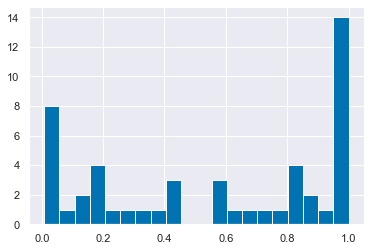

In [1063]:
### imputing gaps!

f2f_harmonised["school_fees"].groupby(f2f_harmonised["school_type"]).value_counts(normalize=True).hist(bins=20)

## bi/tri modal

# 80%+ -> Yes, 20%- -> No, else np.nan

# keep separate as 'imputed'
# should we do that for 'where' as well?
# and exam?

# guess so

In [1057]:
school_type_79
ge = "1979"
replace_dict = {"no":"No","yes":"Yes","dk":np.nan,0:np.nan}
## codebook says there's a "two or more" option! is that what 0 refers to???
school_exam_79 = BES_df_list[ge]['m000237'].replace(replace_dict)
school_exam_79.value_counts()

school_exam_79.groupby(school_type_79).value_counts(normalize=True).sort_index()
## hmm - what to trust??

m183314                       m000237
abroad_nos                    No         1.000000
allage                        No         1.000000
central                       No         0.434783
                              Yes        0.565217
commercialprivate             No         0.666667
                              Yes        0.333333
comprehensive                 No         0.845161
                              Yes        0.154839
convent_denom_nonselective    No         0.923077
                              Yes        0.076923
convent_denom_selective       Yes        1.000000
county                        No         0.076923
                              Yes        0.923077
countyhigh                    No         0.627273
                              Yes        0.372727
directgrant_grantaided        Yes        1.000000
elementary_primary            No         0.938776
                              Yes        0.061224
feepayingindependent          No         0.541667
            

In [1041]:
# 'm000238': 'tuition fees charged at school:-q86b',
ge = "1979"
replace_dict = {"no":"No","yes":"Yes","dk":np.nan,0:np.nan}
## codebook says there's a "two or more" option! is that what 0 refers to???
school_fees_79 = BES_df_list[ge]['m000238'].replace(replace_dict)
school_fees_79.value_counts()
school_fees_79.groupby(school_type_79).value_counts().sort_index()

m183314                       m000238
abroad_nos                    No           2
allage                        No           9
central                       No          23
commercialprivate             No           1
                              Yes         26
comprehensive                 No         151
                              Yes          3
convent_denom_nonselective    No          15
                              Yes         11
convent_denom_selective       No           5
                              Yes          3
county                        No          10
                              Yes          3
countyhigh                    No          90
                              Yes         19
directgrant_grantaided        No           6
                              Yes          8
elementary_primary            No          96
                              Yes          2
feepayingindependent          No           1
                              Yes         23
feepayingpubschl 

In [970]:
school_type_79
ge = "1979"
f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age"].mean(),f2f_harmonised.loc[f2f_harmonised["dataset"]==ge,"age"][school_type_79=="countyschool"].mean()

# fractionally older than average
# 12/13 "exam to enter last school"
# 3/13 "tuition fees charged at school"

(46.370839936608554, 50.0)

In [972]:
ge  ="1979"
BES_df_list[ge]["m000237"][school_type_79=="countyschool"]

150     yes
198      no
211     yes
301     yes
622     yes
830     yes
962     yes
964     yes
1089    yes
1221    yes
1273    yes
1597    yes
1672    yes
Name: m000237, dtype: category
Categories (4, object): [0 < 'yes' < 'no' < 'dk']

In [975]:
ge  ="1979"
BES_df_list[ge]["m000240"][school_type_79=="countyschool"]

150     yes,full-time
198     yes,part-time
211     yes,full-time
301     yes,part-time
622     yes,full-time
830     yes,part-time
962                no
964     yes,part-time
1089               no
1221    yes,part-time
1273               no
1597               no
1672               no
Name: m000240, dtype: category
Categories (4, object): [0 < 'yes,full-time' < 'yes,part-time' < 'no']

In [ ]:
## changing categories in half a year!

In [ ]:
# 1974_feb, 1974_oct

In [911]:
## School vars

# school att/ last_attended 70-87
# exam 79,83
# fee-paying school - 19,15,97,92,87,83,79,
# school in uk y/n 83




In [ ]:
## Can't find anything separate for "County High Schools" (seems just another name for grammar schools/random name to stick on schl)
## no - repeated reference to county/council schools

## "Intermediate" - middle school maybe? - looks like
# https://en.wikipedia.org/wiki/List_of_middle_schools_in_England
# school that covers upper primary(4-8)/lower secondary(8-12)
# sometimes the schools are even more broad "combined schools" 4-12
# https://en.wikipedia.org/wiki/Combined_school

## think this may also relate to "all age" schools (why are these in with 'advanced divisions'???)
## ditto, why are 'intermediate/middle schools' in with technical/central/highergrade schools?

# intermediate may refer to "technical and intermediate" in this act:
# https://hansard.parliament.uk/Commons/1896-03-02/debates/0f614193-f639-45c5-9856-960f19da8afe/IntermediateAndTechnicalEducation


# County and Council references maybe to who oversees?
# https://en.wikipedia.org/wiki/History_of_education_in_England#Balfour_and_Local_Education_Authorities
# I think these are maybe 1900-1945 schools - set up by LEAs before tripartite system
# check ages

In [ ]:
# 1970

# not school but FE - but no way to know if grammar or public school
schl_university
# not school but FE - but no way to if tech or???
schl_technicalcollege


feepayingpubschl
commercialprivate
grammar_and_seniorsecondary
grammar_countyhigh_seniorsecondary_directgrant
elementary_secondarymodern_technical_central_highergrade_church
secondarymodern_elementary_church_juniorsecondary
technical_central_intermediate_highergrade
comprehensive

# 1974_feb, 1974_oct
elementary
secondarymodern_juniorsecondary
technical
grammar_countyhigh_seniorsecondary_highergrade
directgrant_grantaided
specialforhandicapped
other
central_intermediate_senior_council
allage_advanceddivision
convent_denom_nonselective
convent_denom_selective

# 1979
# is primary/elementary === elementary?
central
higherelementary
allage # allage_advanceddivision?
juniorsecondary
countyschool # council?
secondarymodern
seniorsecondary
grammar
directgrant # directgrant_grantaided
independent # really diff from public school
    # all independent are 'fee charging', but some subset are historically known as 'public'
other_uk
abroad_elementary
abroad_statesecondary
abroad_privatesecondary
abroad_NOS # ??? national orthodox schooling? No Other Schooling?

# separate schooled_where (Scot/Eng&Wales/Abroad)
# maybe also a "selective y/n flag"
# 1983
grantaided #(== grant or voluntary aided?)
juniorsecondary_higherelementary
convent_denom (<-convent_denom_nonselective, <-convent_denom_selective)




In [ ]:
# basic nomenclature
# Primary School
# Secondary School 11-16 (occasionally 11-18 to include A levels or 13-18 for some public schools)
    # sometimes separated into lower secondary (11-14), upper secondary (14-18)
# Vocational/Tertiary

In [ ]:
# https://en.wikipedia.org/wiki/Education_in_Scotland_in_the_twentieth_century
# Scottish education system seems to be universal, free and compulsory from very early (1872)
# Shift in 1945 is consolidation, not creating from scratch
# "leaving certificate" -> "ordinary grade"/"higher grade"
# weirdly scottish uni falls behind in funding/participation 1900-1950s
# 1872 - elementary state ed up to 12
# 1890 - school fees abolished
# 1918 - universal free ed (takes ~20 years to implement)
#   exam at 12
    # vocational education 'advanced divisions' - > junior secondary
    # old academies/higher grade schools -> senior secondaries
# 1945 smoother, basically just expanding second ed (part for girls)
# selection end in 1965, late 70s 75% in non-selective, early 80s down to 5% (private schools)

# "Advanced Divisions" - elementary school with a technical lean - turn into Junior Secondaries



# different schedule of min school leaving ages!
# junior secondary -> leave at 14

In [ ]:
# https://en.wikipedia.org/wiki/Elementary_school_(England_and_Wales)
# 1870-1944, replacing the pre-existing voluntary/church basis for the education of the working classes
# (dame schools/sunday schools/ragged schools/voluntary schools)
# 1891 act makes it possible for Elementary Schooling to be free, but fees aren't forbidden until 1918
# originally only run until 12, but start (1900) running 'higher elementary classes/schools' for more capable older pupils
# Note - technical and arts schools are still running alongisde this and sometimes competing for pupils
# https://en.wikipedia.org/wiki/Higher_Grade_School

In [ ]:
# https://en.wikipedia.org/wiki/Central_school
# selective secondary education with focus on technical/commercial skills - positioned between grammar and elementary
# 1911-1944 (they mostly become secondary modern - weirdly, not technical!)

In [ ]:
# technical colleges appear to exist in this period

# "junior technical schools" to provide vocational education at secondary level introduced in 1930s, but v few open

In [ ]:
# https://en.wikipedia.org/wiki/Tripartite_System_of_education_in_England,_Wales_and_Northern_Ireland
# replaces pre-existing adhoc system (elementary schools for working class, grammar schools with exams&fees for middle class)
# Based on a selective exam at 11/13 proposing that education be divided at that point (-> primary/secondary division)
# Intended to split pupils into three groups for different schools:
# (1) Grammar Schools (highly academic -> university, mixture of pupils paying fees and funded by state)
# (2) Secondary Technical Schools (scientists and engineers, also selective)
    # "technical grammar"/"technical high" schools
# (3) Secondary Modern Schools (everyone else, intended to be low skill - altho freq offering academic streams CSE/o-level/a-level courses)
# Intended to have "parity of esteem"
# Proposal was rather abstract, didn't focus on where money would come from ... so it mostly didn't
# and when funds were provided they mostly went to Grammar Schools, further undermining "parity of esteem"
# Serious regional and gender (remember, a lot of these institutions are single sex!) imbalances
# The technical branch was never properly funded and basically withered on the vine -> de facto bipartite system

In [ ]:
# https://en.wikipedia.org/wiki/Secondary_modern_school

# Secondary modern UK 1944-1970s under https://en.wikipedia.org/wiki/Tripartite_System_of_education_in_England,_Wales_and_Northern_Ireland
# Continue in NI as "secondary schools", in Buckinghamshire as "community schools", in Lincolnshire&Wirral as "high schools"
# for majority of 11-15 who don't pass "11+" exam
# replaced with Comprehensives from 1965 forwards

In [ ]:
## OMG stupid f***ing UK school system

# Direct grant grammar school (top-tier of grammar school system)
    # 1926-> forwards these schools had to choose source of grant
        # 'direct grant'<- central government (1932 N=240 secondary schools)
        # 'grant-aided'<- local authorities (1932 N=1138 secondary schools)
    # confusingly, this looks pretty much exacly like the Public FeePaying School model now
    # There were therefore 179 direct grant grammar schools, alongside over 1200 maintained grammar schools
    # Beside the Direct Grant Scheme, the Act also made provision for LEAs to fund places at independent schools in areas
    # where there was a shortage of appropriate places in maintained schools. For example, there might be a lack of selective
    # places, or of selective places in Roman Catholic schools. In the late 1960s, 56 independent schools had over 25%
    # of their places funded by LEAs in this way, with seven of them over 75% LEA-funded
    # In 1966, when direct grant schools were at their height, they educated 3.1% of secondary pupils across England and Wales,
    # while independent schools accounted for 7.1%. For A-level students, these proportions rose to 6.2% and 14.7% respectively
    
    # The proportion of teachers with first and second class degrees was slightly lower than in their maintained counterparts.[32]
    # The principal difference from the maintained schools was greater freedom from LEA influence
    
    # Although there was much variation, these schools as a group were middle-class institutions, with many tending to move closer to the independent schools in social composition.[34] On average, three-quarters of pupils came from white-collar homes, including 60% with fathers in management or the professions, while only 7% were children of semi-skilled or unskilled workers.[35] On average, the intake of the schools was also more academically selective than either maintained grammar schools or independent schools.[36] Their results were correspondingly high, with 60% of their pupils staying on to age 18 and 38% going on to university, significantly greater proportions than either of the other groups of schools.[37]

In [929]:
ge = "1979"
BES_df_list[ge]["m183314"].value_counts().sort_index()

elementary or primar     98
central school           23
higher elementary       393
all-age school            9
junior secondary         27
county school            13
secondary modern        404
comprehensive           155
convent non-selectiv     26
senior secondary         52
technical                40
grammer                 312
direct grant             14
commercial private       27
convent selective         8
independent              24
public school            33
special school            5
other u.k. school        10
high school or secon    110
abroad-elementary        14
abroad-state seconda     34
abroad-private secon     23
abroad n.o.s.             2
Name: m183314, dtype: int64

In [918]:
ge = "1983"
BES_df_list[ge]["q61a"].value_counts()

# anyFE!

never               2960
in past other        541
in past univ etc     359
now univ etc          45
now     other         30
still at school        5
Name: q61a, dtype: int64

In [ ]:
## note - this is also *attendance* data, not whether they dropped out or not/got the grades!

In [840]:
BES_df_list["1970"]["v857b"].value_counts()

0.0    2877
2.0      14
6.0       9
7.0       6
9.0       4
5.0       4
4.0       4
1.0       2
3.0       2
Name: v857b, dtype: int64

In [828]:
BES_df_list["1970"]["v857a"].value_counts()

0.0    2167
6.0     354
2.0     205
3.0      89
1.0      44
4.0      30
5.0      13
9.0      10
7.0      10
Name: v857a, dtype: int64

In [829]:
sum( BES_df_list["1970"]["v857a"]>0 )

755

In [833]:
pd.Series(list(zip(BES_df_list["1970"]["v857a"],BES_df_list["1970"]["v857b"]))).value_counts()

(0.0, 0.0)    2165
(6.0, 0.0)     336
(2.0, 0.0)     189
(3.0, 0.0)      84
(1.0, 0.0)      42
(4.0, 0.0)      30
(5.0, 0.0)      11
(9.0, 0.0)      10
(7.0, 0.0)      10
(6.0, 2.0)       8
(2.0, 6.0)       5
(6.0, 7.0)       4
(2.0, 5.0)       3
(3.0, 2.0)       3
(2.0, 4.0)       3
(6.0, 9.0)       3
(0.0, 2.0)       2
(3.0, 6.0)       2
(5.0, 6.0)       2
(2.0, 1.0)       2
(2.0, 7.0)       1
(6.0, 4.0)       1
(2.0, 3.0)       1
(6.0, 5.0)       1
(1.0, 7.0)       1
(1.0, 2.0)       1
(2.0, 9.0)       1
(6.0, 3.0)       1
dtype: int64

In [694]:
ge = "1979"
BES_df_list[ge]["m000249"].value_counts(dropna=False)
# 'm000249': 'professional qualification-q91',

r has no quals        887
r doesnt have qual    854
r has qual            152
Name: m000249, dtype: int64

In [695]:
ge = "1979"
BES_df_list[ge]["m000251"].value_counts(dropna=False)
# 'm000251': 'special qual. gained at work-q91',

r has no quals        887
r doesnt have qual    879
r has qual            127
Name: m000251, dtype: int64

In [696]:
ge = "1979"
BES_df_list[ge]["m000252"].value_counts(dropna=False)
# 'm000252': 'other qualification-q91',,

r has no quals        887
r doesnt have qual    803
r has qual            203
Name: m000252, dtype: int64

In [ ]:
## try to link up 1979 categories

# 'm000245': 'school certificate or matric-q91',
# https://en.wikipedia.org/wiki/School_Certificate_(United_Kingdom) (abolished 1951 -> replaced with gce O levels)

# rsa or c&g -> one big shared category

# which comb of these three categories best matches the two from later waves???
# 'm000249': 'professional qualification-q91', ???
# 'm000251': 'special qual. gained at work-q91', -> other tech/business?
# 'm000252': 'other qualification-q91', - is this diplomas maybe?

In [665]:
BES_df_list[ge]["edqual16"].value_counts()

no post school qual    1885
does not have qual     1503
other voc/academic      203
not     answered         21
don't   know              3
Name: edqual16, dtype: int64

In [606]:
ge="1997"
BES_df_list[ge]['edqual22']

0        does not have qual
1       no post school qual
2        does not have qual
3        does not have qual
4       no post school qual
               ...         
3610     does not have qual
3611     does not have qual
3612     does not have qual
3613     does not have qual
3614    no post school qual
Name: edqual22, Length: 3615, dtype: category
Categories (5, object): ['no post school qual' < 'does not have qual' < 'has qualification' < 'don't   know' < 'not     answered']

No     3204
Yes     325
NaN       5
Name: v913b_03, dtype: int64

In [611]:
## nope - they're actually quite distinct!
BES_df_list[ge]['edqual23'].groupby(BES_df_list[ge]['edqual22']).value_counts(dropna=False)

edqual22             edqual23           
no post school qual  no post school qual    1885
does not have qual   does not hve qual      1342
                     has qualification       128
has qualification    does not hve qual       139
                     has qualification        97
don't   know         don't   know              3
not     answered     not     answered         21
Name: edqual23, dtype: int64

In [607]:
ge = "1997"
replace_dict = {np.nan:"Yes","no qualification":"No","not answered":np.nan}
BES_df_list[ge]['edqual22'].replace(replace_dict).value_counts(dropna=False)

no post school qual    1885
does not have qual     1470
has qualification       236
not     answered         21
don't   know              3
Name: edqual22, dtype: int64

In [610]:
ge = "1997"
replace_dict = {np.nan:"Yes","no qualification":"No","not answered":np.nan}
BES_df_list[ge]['edqual23'].replace(replace_dict).value_counts(dropna=False)

no post school qual    1885
does not hve qual      1481
has qualification       225
not     answered         21
don't   know              3
Name: edqual23, dtype: int64

In [526]:
ge = "2015"
education = BES_df_list[ge]["education"]#.value_counts()
edlevel = BES_df_list[ge]["edlevel"]

education.groupby(edlevel).value_counts()

edlevel            education                                    
No qualifications  No qualification                                 788
GCSE D-G           GCSE D-G, CSE grades 2-5, O level D-E             77
                   Clerical and commercial qualifications            41
                   Youth training certificate, skill seekers          4
GCSE A*-C          GCSE A*-C, CSE grade 1, O level grade A-C        282
                   City&Guilds level 1, NVQ/SVQ 1 and equivalent     56
                   Recognised trade apprenticeship                   45
                   Scottish Standard grades, Ordinary bands          10
A-level            A level or equivalent                            201
                   ONC/OND, City&Guilds level 3, NVQ/SVQ 3          163
                   City&Guilds level 2, NVQ/SVQ 2 and equivalent    127
                   Scottish Higher or equivalent                     18
Undergraduate      First degree                                     358

In [501]:
ge = "2017"
education = BES_df_list[ge]["education"]
edlevel = BES_df_list[ge]["edlevel"]

education.groupby(edlevel).value_counts(dropna=False)

edlevel            education                                    
No qualifications  No qualification                                 489
Below GCSE         GCSE D-G, CSE grades 2-5, O level D-E             65
                   Clerical and commercial qualifications            35
GCSE               GCSE A*-C, CSE grade 1, O level grade A-C        233
                   City&Guilds level 1, NVQ/SVQ 1 and equivalent     37
                   Recognised trade apprenticeship                   30
                   Scottish Standard grades, Ordinary bands          11
A-level            A level or equivalent                            138
                   ONC/OND, City&Guilds level 3, NVQ/SVQ 3          120
                   City&Guilds level 2, NVQ/SVQ 2 and equivalent     94
                   Scottish Higher or equivalent                     11
Undergraduate      First degree                                     335
                   HNC/HND, City&Guilds level 4, NVQ/SVQ 4/5        178

In [ ]:
# futher education type/school type 1959-1974_oct 
    # get from this + school leave age -> inferred qualifications?
# full qual list 1979-1997
# highest qual 2001-2019
# edlevel 2015-2019 (highest qual -> edlevel)

#1979 has some "further ed & type" + qual overlap

# 	-> anyFE Y/N/np.nan
# 	-> anyQuals Y/N/np.nan
# 		-> school/post-school
# 	-> qualifications (dummies)/qualifications(highest)
# 	-> privateSchool ed Y/N/np.nan (fees paying)
#     -> examNeeded (grammar?)
    
# 	-> schoolType


In [674]:
ge="1992"
{k:v for k,v in BES_label_list[ge].items() if "oversea" in v}

{'v912b_04': 'qual obtained:overseas school leaving q912b.04'}

In [1200]:
ge = "1997"
# BES_df_list[ge]["edqual9"]

In [492]:
ge = "1979"
further_ed_and_type = BES_df_list[ge]['m185a315']
any_further_ed_or_training = BES_df_list[ge]['m000240']



In [496]:
further_ed_and_type.value_counts()

na or none              1036
technical college        201
commercial & secreta     115
university               107
apprenticeship            98
other vocational          85
teacher training          55
other technical or t      50
polytechnic               43
nurse training            37
non-vocational            37
art college               13
13                        12
agricultural college       4
Name: m185a315, dtype: int64

In [497]:
any_further_ed_or_training.value_counts()

no               1008
yes,full-time     432
yes,part-time     415
0                  38
Name: m000240, dtype: int64

In [498]:
further_ed_and_type.groupby(quals).value_counts()

m000242  m185a315            
No       na or none              776
         commercial & secreta     27
         other vocational         23
         technical college        21
         non-vocational           20
         other technical or t     11
         nurse training            4
         teacher training          1
         apprenticeship            1
         art college               1
         agricultural college      1
         13                        1
Yes      na or none              227
         technical college       180
         university              107
         apprenticeship           97
         commercial & secreta     87
         other vocational         61
         teacher training         54
         polytechnic              43
         other technical or t     39
         nurse training           33
         non-vocational           17
         art college              12
         13                       11
         agricultural college      3
Name: m1

In [495]:
further_ed_and_type.groupby(any_further_ed_or_training).value_counts()

m000240        m185a315            
0              na or none               35
               technical college         3
yes,full-time  university               99
               technical college        63
               commercial & secreta     53
               teacher training         52
               apprenticeship           42
               nurse training           30
               other vocational         27
               polytechnic              18
               other technical or t     17
               art college              11
               13                        9
               na or none                4
               non-vocational            4
               agricultural college      3
yes,part-time  technical college       134
               commercial & secreta     62
               other vocational         54
               apprenticeship           50
               non-vocational           32
               other technical or t     31
               pol

In [448]:
ge = "1979"
(BES_df_list[ge][['m000242','m000243','m000244','m000245','m000246','m000247',
                 'm000248','m000249','m000250','m000251','m000252',
                ]]=="r has qual").any(axis=1).sum()

971

In [449]:
BES_df_list[ge][['m000242','m000243','m000244','m000245','m000246','m000247',
                 'm000248','m000249','m000250','m000251','m000252',
                ]].stack().value_counts()

r has no quals        9757
r doesnt have qual    9179
r has qual            1887
dtype: int64

In [455]:
.sum()

35

In [ ]:
(BES_df_list[ge][['v56b','v56c','v56d','v56e','v56f','v56g',
                 'v56h','v56i','v56j','v56k','v56l','v56m','v56n',
                 'v56o','v56p','v56q','v56r','v56s',
                ]]=="has qualification").replace(False,np.nan).fillna(method='ffill',axis=1)['v56s'].sum()

In [440]:
(BES_df_list[ge][['v56b','v56c','v56d','v56e','v56f','v56g',
                 'v56h','v56i','v56j','v56k','v56l','v56m','v56n',
                 'v56o','v56p','v56q','v56r','v56s',
                ]]=="has qualification").replace(False,np.nan).fillna(method='ffill',axis=1)['v56s'].sum()

2253

In [435]:
BES_df_list[ge].shape

(3826, 471)

In [383]:
BES_df_list[ge]["bq75b"].value_counts(dropna=False)

15 or younger      1025
16                  808
19 or older         647
18                  254
17                  212
still in school      78
refused               4
don't know            2
not app               0
Name: bq75b, dtype: int64

In [384]:
BES_df_list[ge]["bq76a"].value_counts(dropna=False)

NaN           2349
yes            422
no             256
refused          2
don't know       1
Name: bq76a, dtype: int64

In [390]:
BES_df_list[ge][["aq43a","bq76a"]].isnull().all(axis=1)

index
0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3030, dtype: bool

Yes    1922
No     1096
NaN      12
Name: bq76a, dtype: int64

In [400]:
BES_df_list[ge][["aq43a","bq76a"]].replace(replace_dict).fillna(method='ffill',axis=1)["bq76a"]

index
0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
3895    Yes
3896    Yes
3897     No
3898    Yes
3899    Yes
Name: bq76a, Length: 3030, dtype: object

In [490]:
ge = "1974_oct"
{k:v for k,v in BES_label_list[ge].items() if re.search("degree",v.lower())}

{}

In [1206]:
f2f_harmonised.to_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_temp.zip", compression='zip')